# Credit EDA Case Study

# 1.importing required libraries

In [1]:
#import warnings

import warnings 
warnings.simplefilter('ignore')

In [2]:
#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

In [3]:
#read csv file

df=pd.read_csv("application_data.csv")
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
#structure of data

df.shape

(307511, 122)

# 2.DATA CLEANING

### Checking Null Values

In [5]:
# checking columns which have null values

null_Values=df.isnull().sum()
null_Values

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [6]:
#removing columns which have null values more than 30%

null_Values_1=list(null_Values[null_Values.values>=0.30].index)
df.drop(labels=null_Values_1,axis=1,inplace=True)
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,Working,...,0,0,0,0,0,0,0,0,0,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,State servant,...,0,0,0,0,0,0,0,0,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,Working,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,Working,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,Working,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,Working,...,0,0,0,0,0,0,0,0,0,0
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,Pensioner,...,0,0,0,0,0,0,0,0,0,0
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,Working,...,0,0,0,0,0,0,0,0,0,0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,Commercial associate,...,0,0,0,0,0,0,0,0,0,0


In [7]:
#checking null values

df.isnull().sum().sort_values(ascending=False).head(60)

FLAG_DOCUMENT_21               0
REGION_POPULATION_RELATIVE     0
REGION_RATING_CLIENT           0
FLAG_EMAIL                     0
FLAG_PHONE                     0
FLAG_CONT_MOBILE               0
FLAG_WORK_PHONE                0
FLAG_EMP_PHONE                 0
FLAG_MOBIL                     0
DAYS_ID_PUBLISH                0
DAYS_REGISTRATION              0
DAYS_EMPLOYED                  0
DAYS_BIRTH                     0
NAME_HOUSING_TYPE              0
WEEKDAY_APPR_PROCESS_START     0
NAME_FAMILY_STATUS             0
NAME_EDUCATION_TYPE            0
NAME_INCOME_TYPE               0
AMT_CREDIT                     0
AMT_INCOME_TOTAL               0
CNT_CHILDREN                   0
FLAG_OWN_REALTY                0
FLAG_OWN_CAR                   0
CODE_GENDER                    0
NAME_CONTRACT_TYPE             0
TARGET                         0
REGION_RATING_CLIENT_W_CITY    0
HOUR_APPR_PROCESS_START        0
FLAG_DOCUMENT_20               0
FLAG_DOCUMENT_8                0
FLAG_DOCUM

In [8]:
#checking percentage

df_missing = df.count() / len(df)
df_missing

SK_ID_CURR                     1.0
TARGET                         1.0
NAME_CONTRACT_TYPE             1.0
CODE_GENDER                    1.0
FLAG_OWN_CAR                   1.0
FLAG_OWN_REALTY                1.0
CNT_CHILDREN                   1.0
AMT_INCOME_TOTAL               1.0
AMT_CREDIT                     1.0
NAME_INCOME_TYPE               1.0
NAME_EDUCATION_TYPE            1.0
NAME_FAMILY_STATUS             1.0
NAME_HOUSING_TYPE              1.0
REGION_POPULATION_RELATIVE     1.0
DAYS_BIRTH                     1.0
DAYS_EMPLOYED                  1.0
DAYS_REGISTRATION              1.0
DAYS_ID_PUBLISH                1.0
FLAG_MOBIL                     1.0
FLAG_EMP_PHONE                 1.0
FLAG_WORK_PHONE                1.0
FLAG_CONT_MOBILE               1.0
FLAG_PHONE                     1.0
FLAG_EMAIL                     1.0
REGION_RATING_CLIENT           1.0
REGION_RATING_CLIENT_W_CITY    1.0
WEEKDAY_APPR_PROCESS_START     1.0
HOUR_APPR_PROCESS_START        1.0
REG_REGION_NOT_LIVE_

In [9]:
#checking null value percentage wise

df_missing = (1-df_missing)*100
df_missing

SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
FLAG_OWN_REALTY                0.0
CNT_CHILDREN                   0.0
AMT_INCOME_TOTAL               0.0
AMT_CREDIT                     0.0
NAME_INCOME_TYPE               0.0
NAME_EDUCATION_TYPE            0.0
NAME_FAMILY_STATUS             0.0
NAME_HOUSING_TYPE              0.0
REGION_POPULATION_RELATIVE     0.0
DAYS_BIRTH                     0.0
DAYS_EMPLOYED                  0.0
DAYS_REGISTRATION              0.0
DAYS_ID_PUBLISH                0.0
FLAG_MOBIL                     0.0
FLAG_EMP_PHONE                 0.0
FLAG_WORK_PHONE                0.0
FLAG_CONT_MOBILE               0.0
FLAG_PHONE                     0.0
FLAG_EMAIL                     0.0
REGION_RATING_CLIENT           0.0
REGION_RATING_CLIENT_W_CITY    0.0
WEEKDAY_APPR_PROCESS_START     0.0
HOUR_APPR_PROCESS_START        0.0
REG_REGION_NOT_LIVE_

In [10]:
# Numerical columns

numerical_columns=df.describe().columns

In [11]:
# Categorical columns

categorical_columns=list(set(df.columns) - set(df.describe().columns))

In [12]:
#shape of data after removing null value columns

df.shape

(307511, 55)

In [13]:
#

#df_missing = df.count() / len(df)
#df_missing

In [14]:
# value counts check for CODE_GENDER columns

df.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [15]:
#checking the  mode of CODE_GENDER column

df.CODE_GENDER.mode()[0]

'F'

In [16]:
#locating the 'XNA' values for the CODE_GENDER column

df.loc[df['CODE_GENDER']=='XNA','CODE_GENDER']

35657     XNA
38566     XNA
83382     XNA
189640    XNA
Name: CODE_GENDER, dtype: object

In [17]:
#replacing the 'XNA' values with the mode of the columns

df.loc[df['CODE_GENDER']=='XNA','CODE_GENDER']=df.CODE_GENDER.mode()[0]

In [18]:
#checking value_counts after replacing 'XNA' values

df.CODE_GENDER.value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [19]:
#checking value_counts after replacing 'XNA' values

df.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [20]:
#droping XNA from ORGANIZATION_TYPE COLUMN

df=df.drop(df.loc[df['ORGANIZATION_TYPE']=='XNA'].index)
df[df['ORGANIZATION_TYPE']=='XNA'].shape

(0, 55)

# Data is Cleaned

# 3. Analysing Dataframe after cleaning

In [21]:
# checking dataframe

df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,Working,...,0,0,0,0,0,0,0,0,0,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,State servant,...,0,0,0,0,0,0,0,0,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,Working,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,Working,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,Working,...,0,0,0,0,0,0,0,0,0,0


In [22]:
#dataframe columns information

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252137 entries, 0 to 307510
Data columns (total 55 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   252137 non-null  int64  
 1   TARGET                       252137 non-null  int64  
 2   NAME_CONTRACT_TYPE           252137 non-null  object 
 3   CODE_GENDER                  252137 non-null  object 
 4   FLAG_OWN_CAR                 252137 non-null  object 
 5   FLAG_OWN_REALTY              252137 non-null  object 
 6   CNT_CHILDREN                 252137 non-null  int64  
 7   AMT_INCOME_TOTAL             252137 non-null  float64
 8   AMT_CREDIT                   252137 non-null  float64
 9   NAME_INCOME_TYPE             252137 non-null  object 
 10  NAME_EDUCATION_TYPE          252137 non-null  object 
 11  NAME_FAMILY_STATUS           252137 non-null  object 
 12  NAME_HOUSING_TYPE            252137 non-null  object 
 13 

# 4. Analysing for outliers 

In [23]:
#select integer datatypes columns for checking outliers

train_numerical = df.select_dtypes(include=['int64','float64']).columns
train_numerical

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20

In [24]:


df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,Working,...,0,0,0,0,0,0,0,0,0,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,State servant,...,0,0,0,0,0,0,0,0,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,Working,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,Working,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,Working,...,0,0,0,0,0,0,0,0,0,0


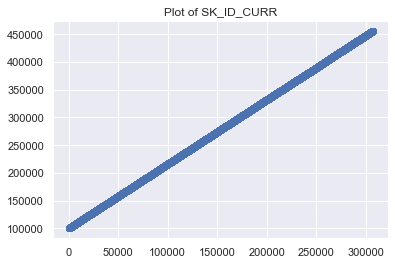

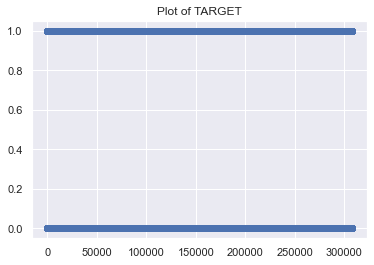

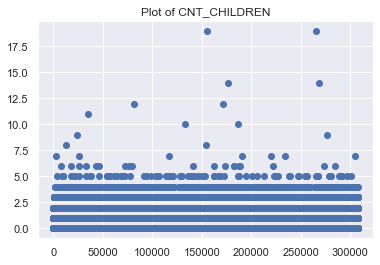

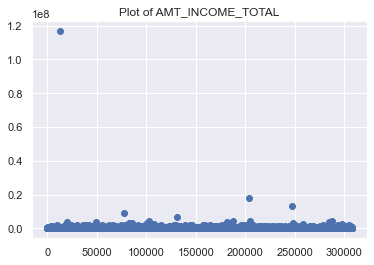

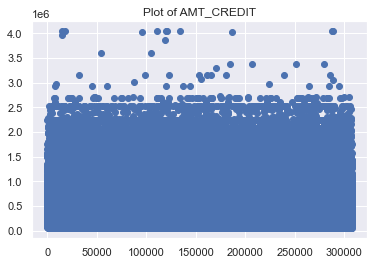

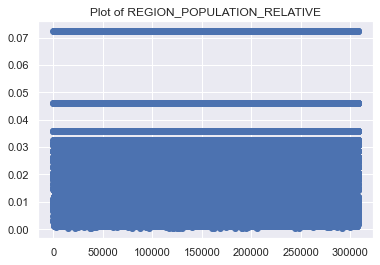

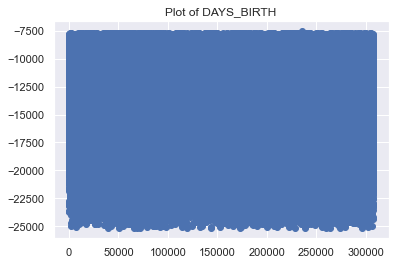

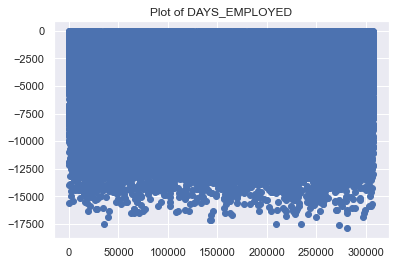

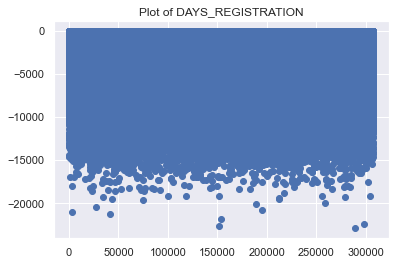

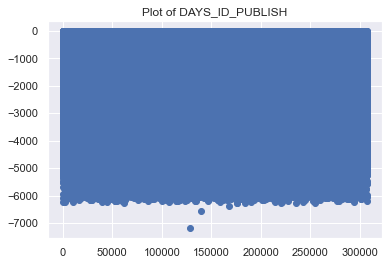

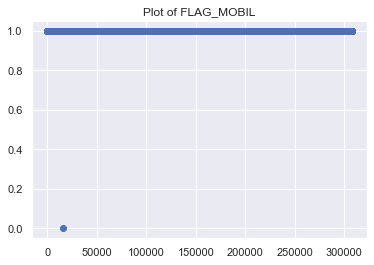

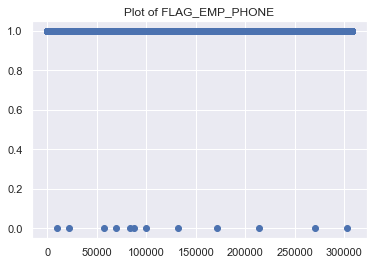

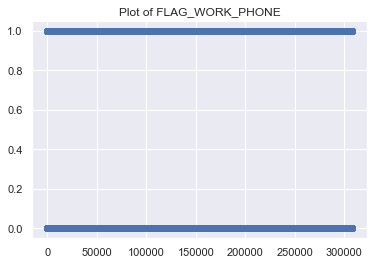

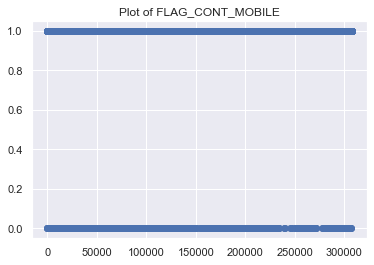

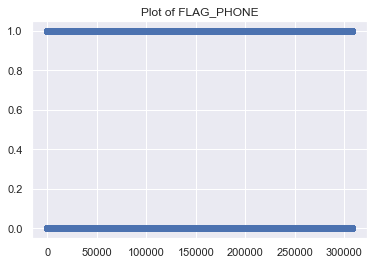

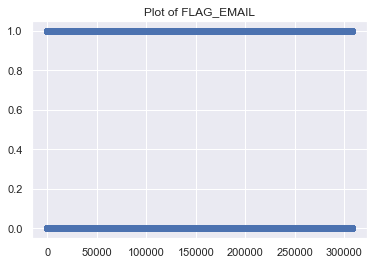

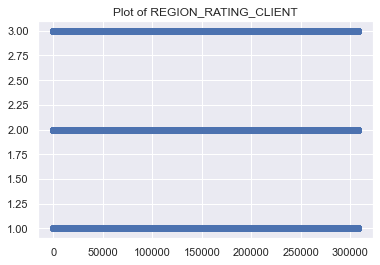

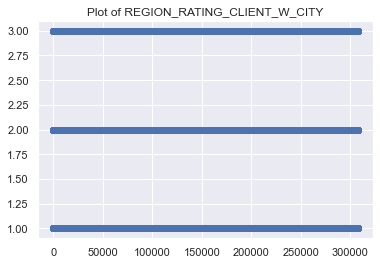

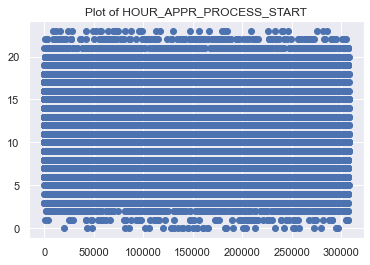

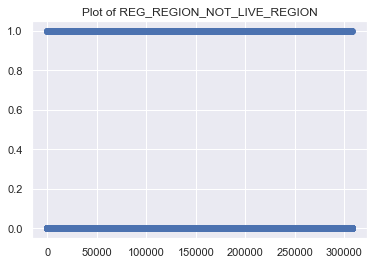

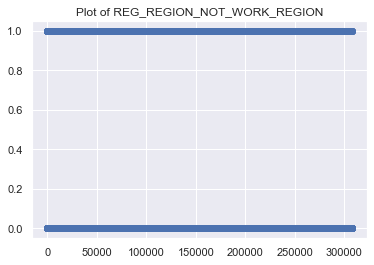

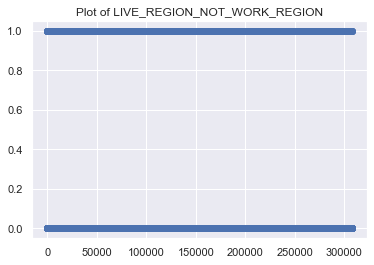

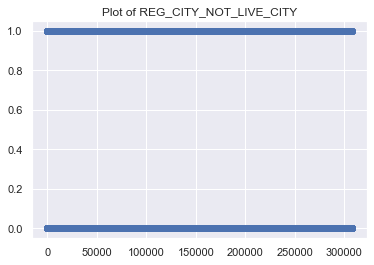

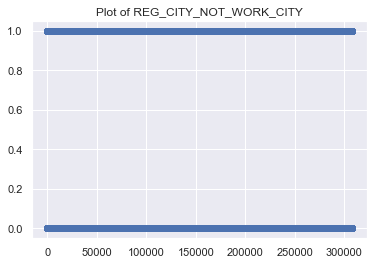

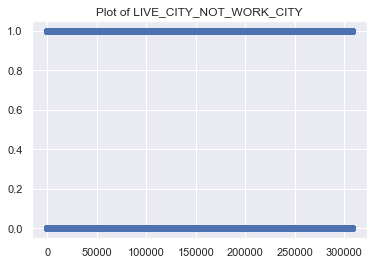

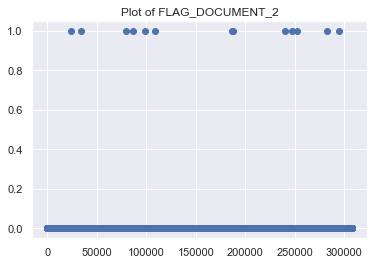

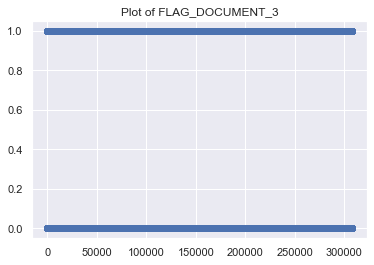

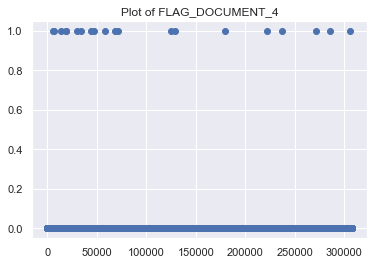

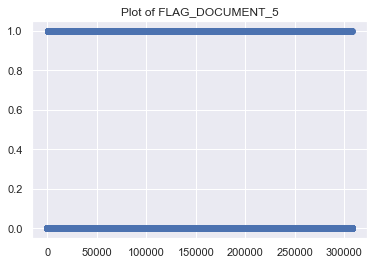

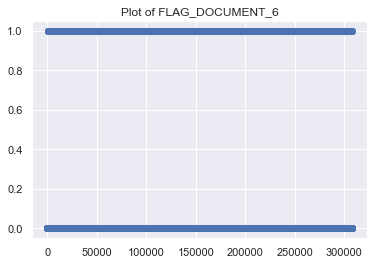

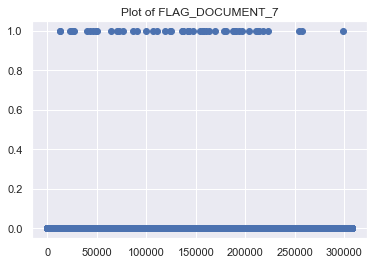

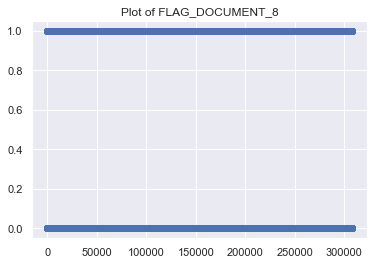

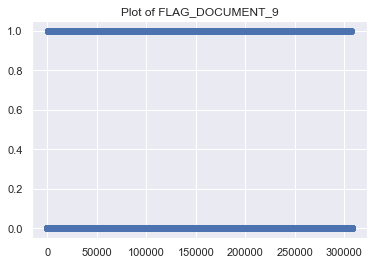

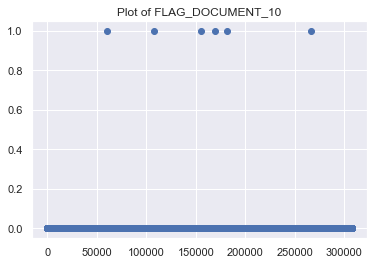

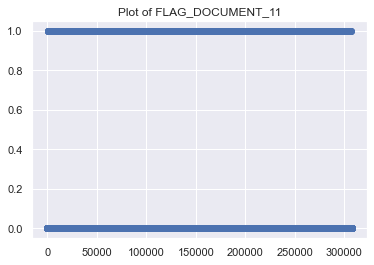

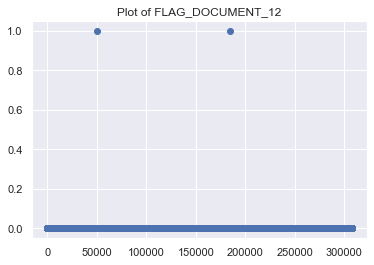

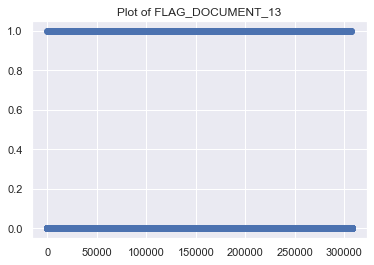

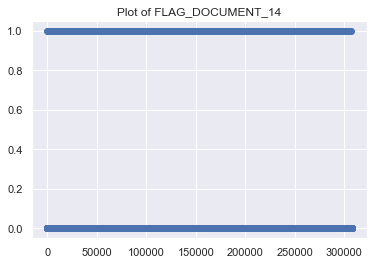

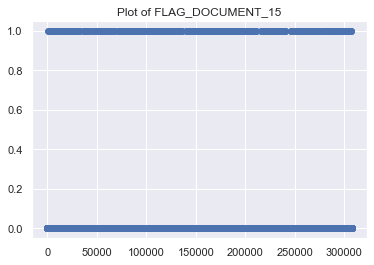

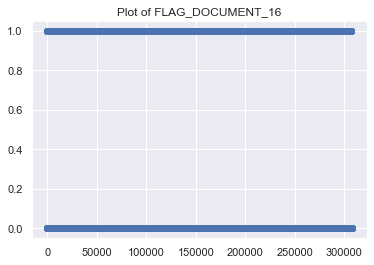

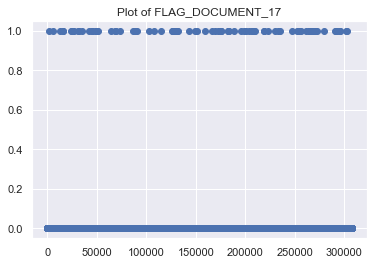

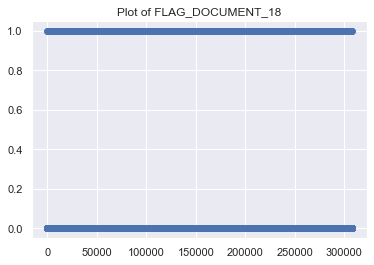

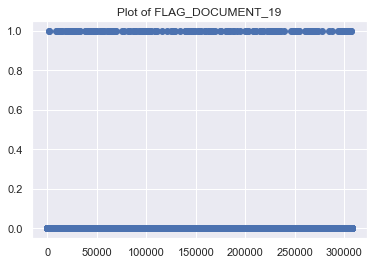

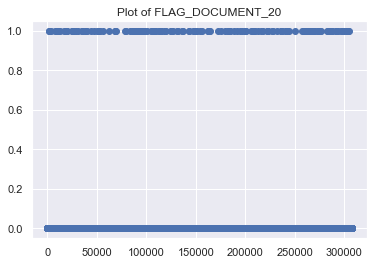

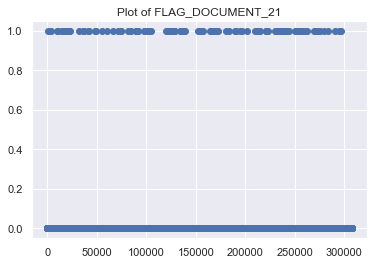

In [25]:
# displaying Outliers by scatterplot

for column in train_numerical:
    plt.scatter(df.index,df[column])
    plt.title("Plot of "+column)
    plt.show();
   

Few points can be concluded from the scatter plot.
    1. CNT_CHILDREN have outlier values having children more than 10
    2. AMT_INCOME_TOTAL have outlier values 
    3. AMT_CREDIT have outlier values


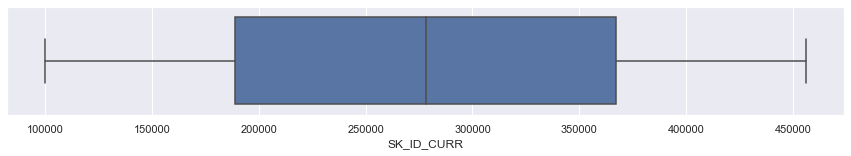

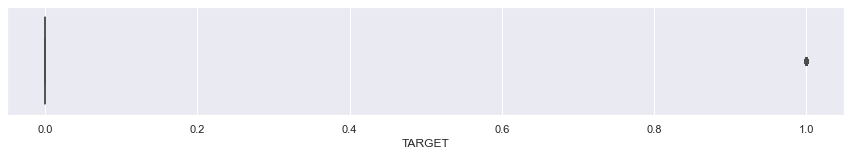

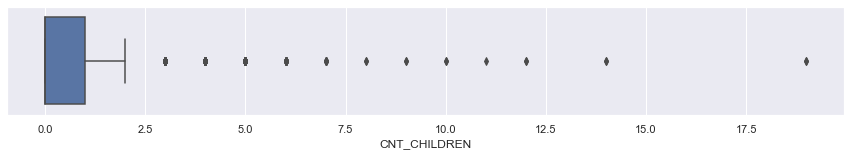

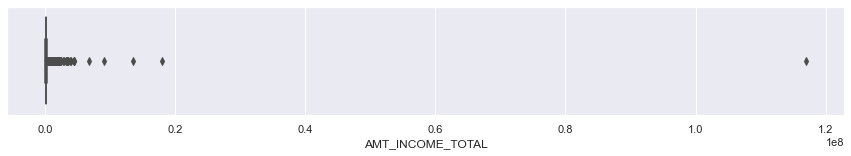

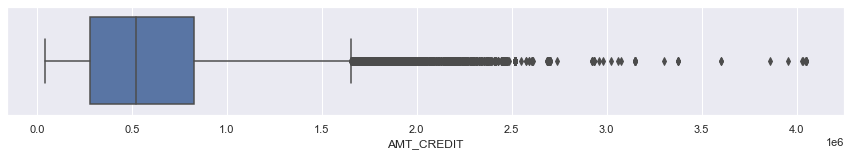

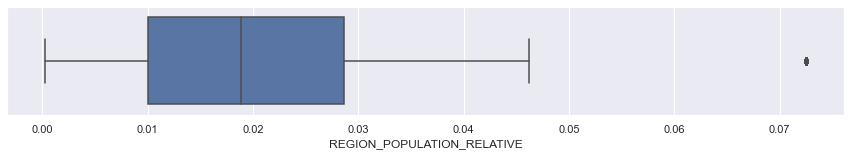

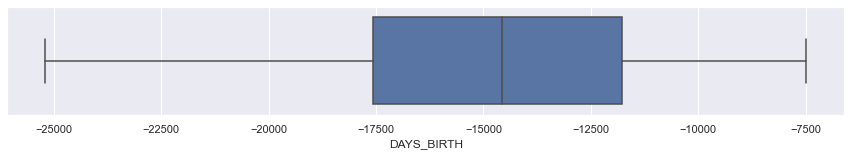

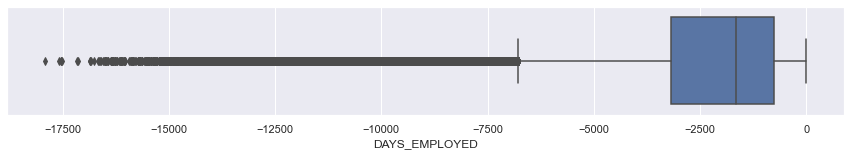

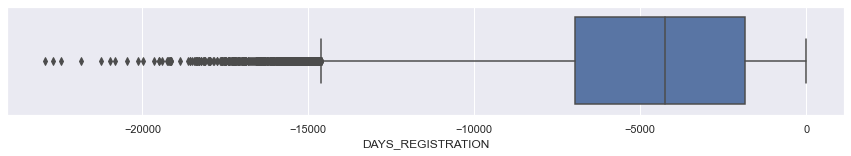

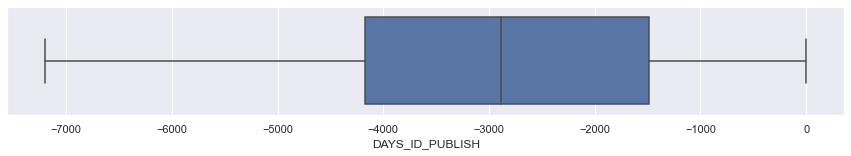

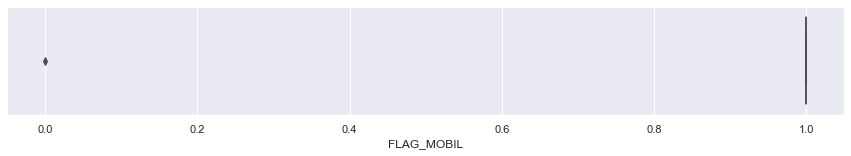

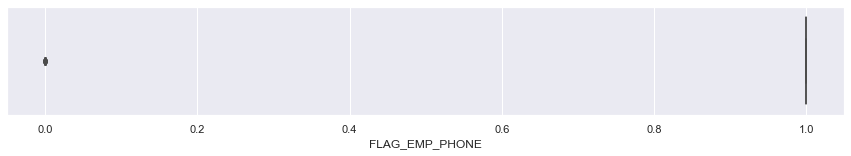

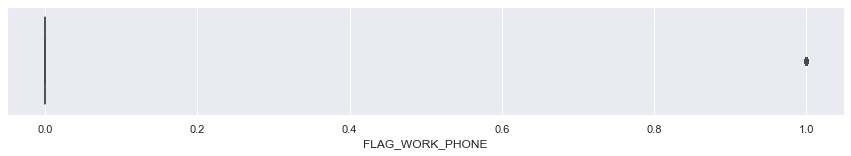

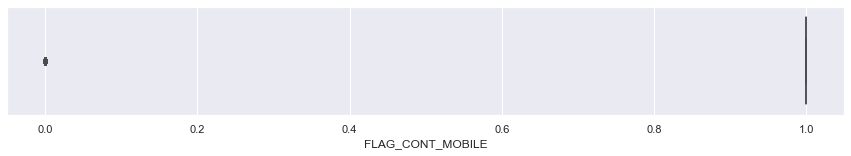

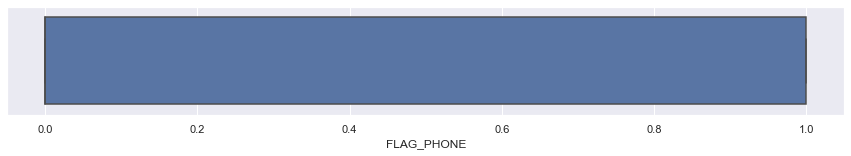

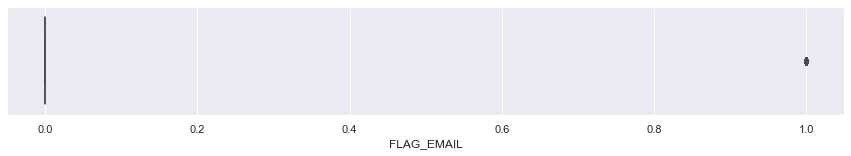

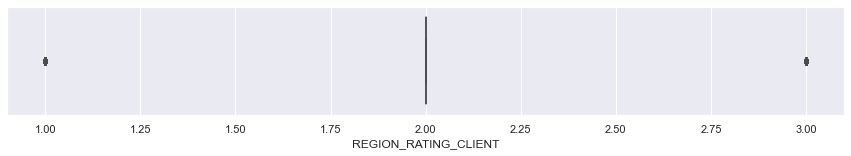

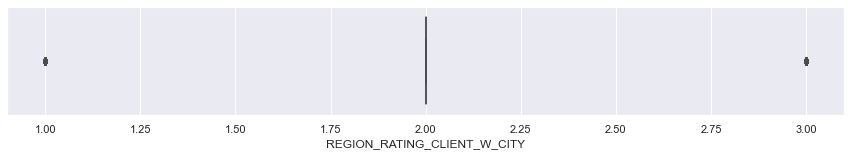

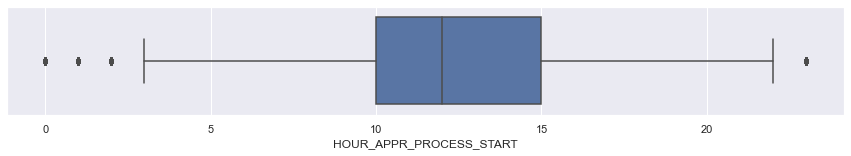

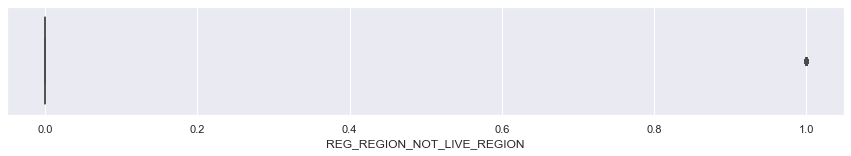

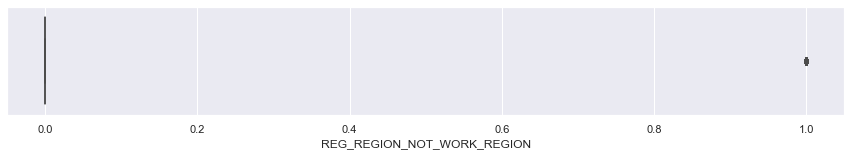

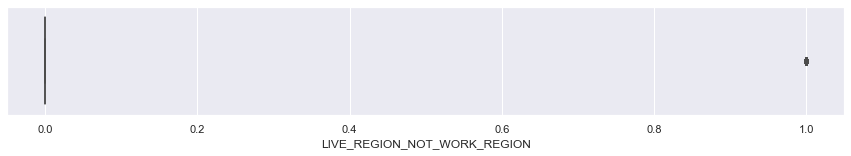

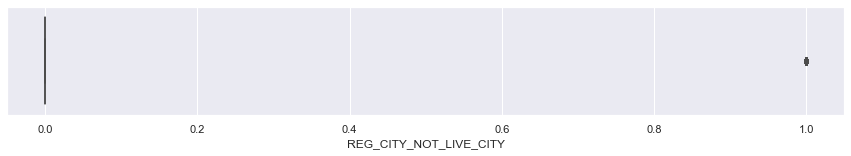

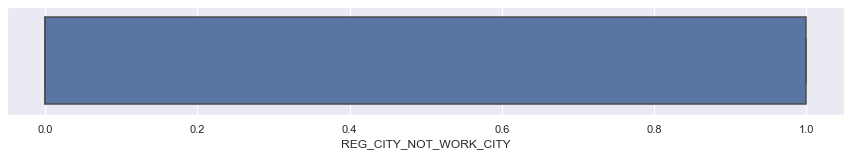

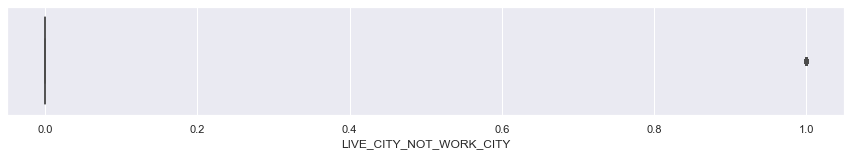

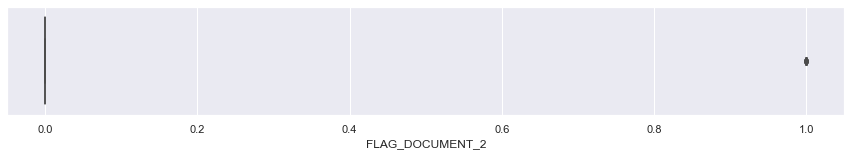

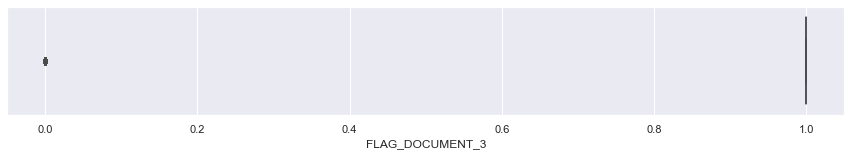

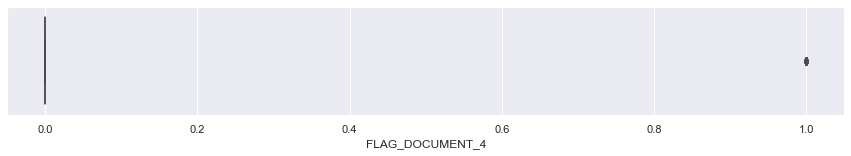

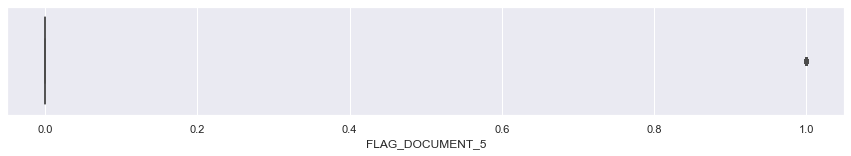

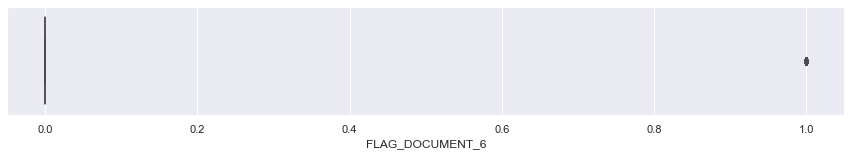

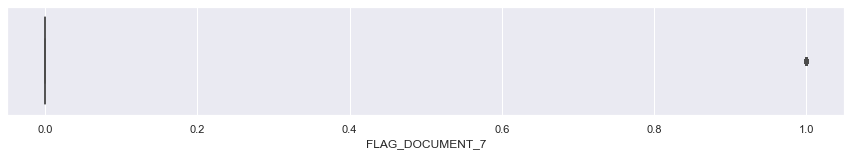

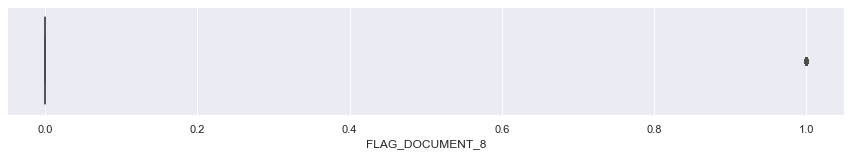

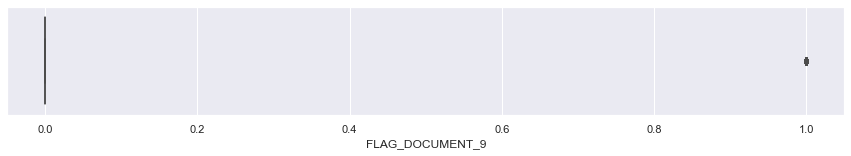

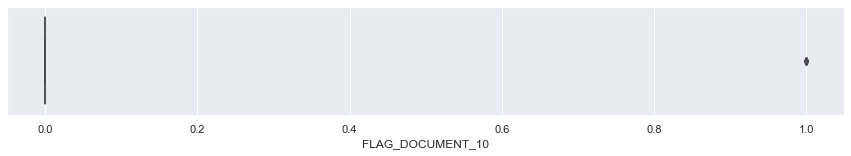

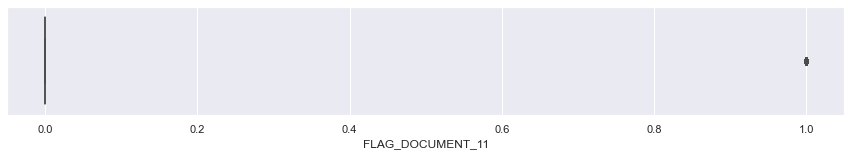

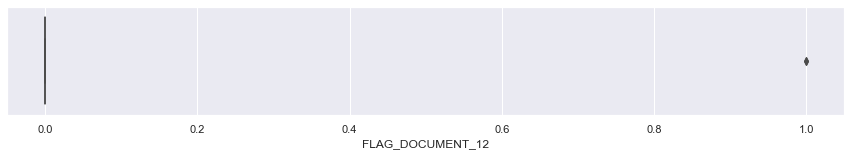

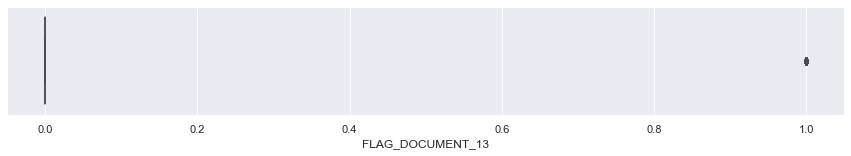

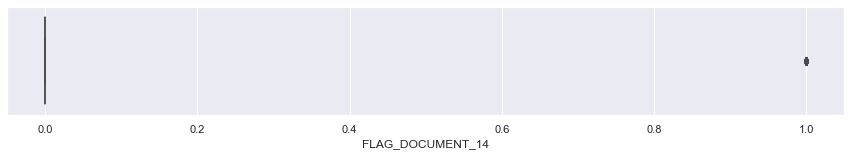

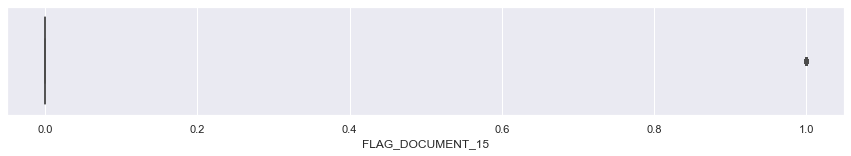

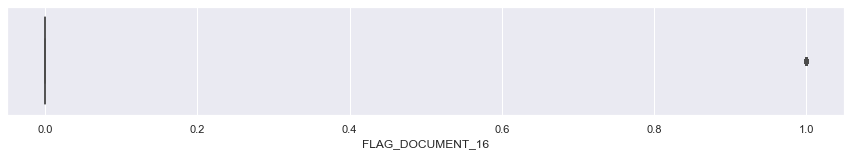

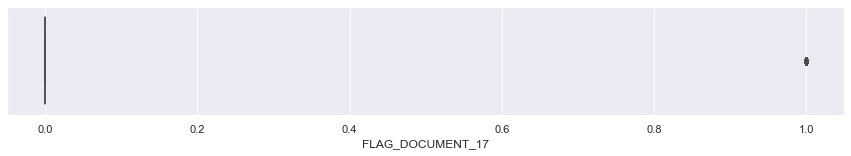

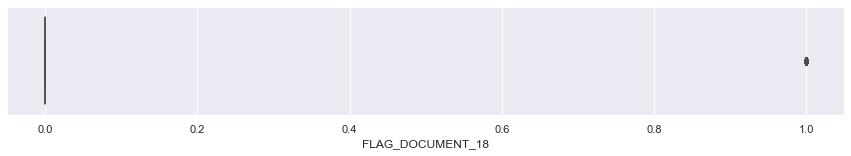

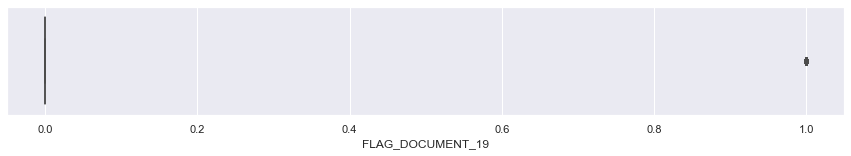

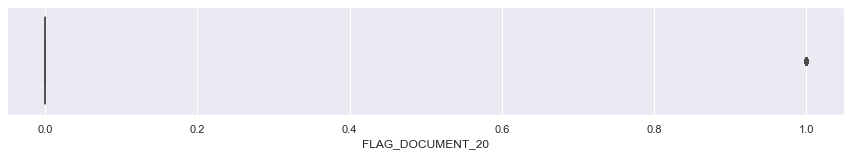

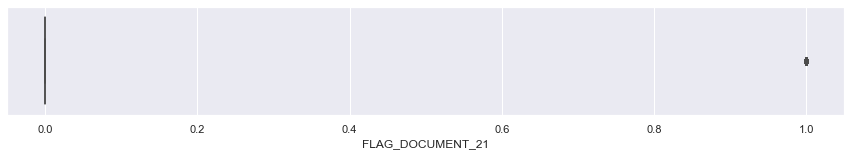

In [26]:
# displaying Outliers by boxplot

for column in train_numerical:
    plt.figure(figsize=(15,2))
    sns.boxplot(df[column])
    plt.show()

Few points can be concluded from the graph.
    1. Some outliers are noticed, Third quartiles is very slim for AMT_INCOME_TOTAL
    2. The first quartile is bigger than third quartile for AMT_CREDIT which means most of the credits of clients are  present in the first quartile.
    3. REGION_POPULATION_RELATIVE have outlier values which lies beyond 0.07

## OUT LIER ANALYSIS COMPLETED

# 5. CHECKING DATA IMBALANCE

In [27]:
#splitting into two dataframe TARGET0 AND TARGET1

target0_df=df.loc[df["TARGET"]==0]
target1_df=df.loc[df["TARGET"]==1]

In [28]:
# Calculating Imbalance percentage
    
# Since the majority is target0 and minority is target1

round(len(target0_df)/len(target1_df),2)

10.55

The Imbalance ratio is 11.39

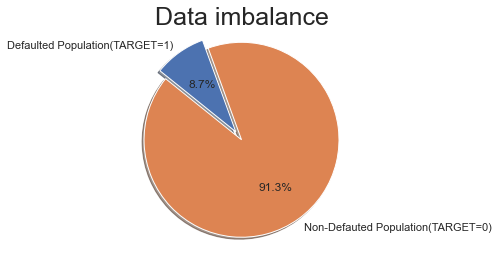

In [29]:
#Checking data Imbalance by PIE CHART

count1 = 0 
count0 = 0
for i in df['TARGET'].values:
    if i == 1:
        count1 += 1
    else:
        count0 += 1
        
count1 = (count1/len(df['TARGET']))*100
count0 = (count0/len(df['TARGET']))*100

x = ['Defaulted Population(TARGET=1)','Non-Defauted Population(TARGET=0)']
y = [count1, count0]

explode = (0.1, 0)  # only "explode" the 1st slice

fig1, ax1 = plt.subplots()
ax1.pie(y, explode=explode, labels=x, autopct='%1.1f%%',
        shadow=True, startangle=110)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Data imbalance',fontsize=25)
plt.show()

We can see that the Application data has high imbalance with Defaulted population at 8.1% as compared to Non-defaulted  population at 91.9% Imbalance ratio is 11.3

# DATA IMBALANCE CHECKED

# 6. Univariate Analysis with respect to TAGET 0 and TARGET 1 for categorical variables

In [30]:
#Splitting Data with respect to TARGET=0 and TARGET=1
df1=df[df["TARGET"]==0]
df1
df2=df[df["TARGET"]==1]
df2

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,Working,...,0,0,0,0,0,0,0,0,0,0
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,Working,...,0,0,0,0,1,0,0,0,0,0
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,Commercial associate,...,0,0,0,0,0,0,0,0,0,0
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,Working,...,0,0,0,0,0,0,0,0,0,0
94,100112,1,Cash loans,M,Y,Y,0,315000.0,953460.0,Commercial associate,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307448,456186,1,Cash loans,M,N,N,1,207000.0,450000.0,Working,...,0,0,0,0,0,0,0,0,0,0
307475,456215,1,Cash loans,F,N,N,1,144000.0,1303200.0,Working,...,0,0,0,0,0,0,0,0,0,0
307481,456225,1,Cash loans,M,N,Y,0,225000.0,297000.0,Working,...,0,0,0,0,0,0,0,0,0,0
307489,456233,1,Cash loans,F,N,Y,0,225000.0,521280.0,Commercial associate,...,0,0,0,0,0,0,0,0,0,0


# 7. Segmented Analysis Male vs Female

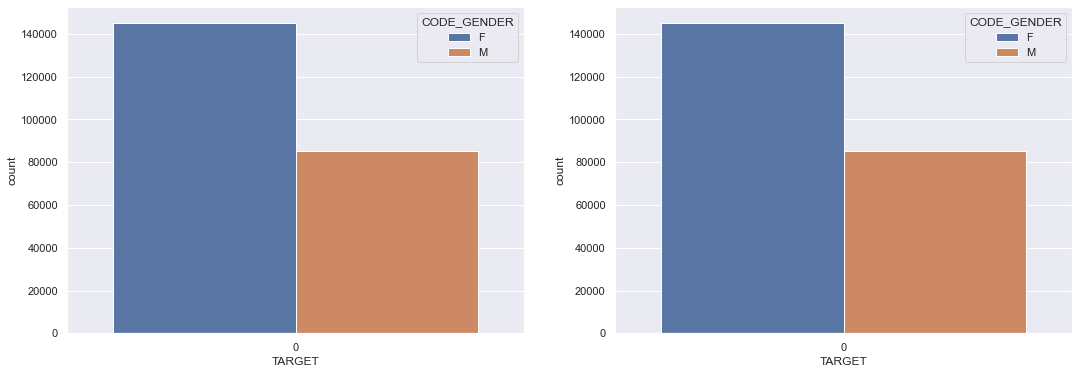

In [31]:
plt.figure(figsize=(18,6))
plt.subplot(121)
sns.countplot(x='TARGET',hue='CODE_GENDER',data=target0_df)
plt.subplot(122)
sns.countplot(x='TARGET',hue='CODE_GENDER',data=target0_df)
plt.show()

We cannot decide much on basis of gender as defaulters and non defaulters both follow same pattern

In [32]:
# create function to plot for categorical variables

def cat_plot_func(var):
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    sns.countplot(var, data=target0_df)
    plt.title('Distribution of '+ '%s' %var +' for Non-Defaulters', fontsize=14)
    plt.xlabel(var)
    plt.xticks(rotation=90)
    plt.ylabel('Number of cases for non-defaulters')
    plt.subplot(1, 2, 2)
    sns.countplot(var, data=target1_df)
    plt.title('Distribution of '+ '%s' %var +' for Defaulters', fontsize=14)
    plt.xlabel(var)
    plt.xticks(rotation=90)
    plt.ylabel('Number of cases for defaulters')
    plt.show()

<Figure size 432x288 with 0 Axes>

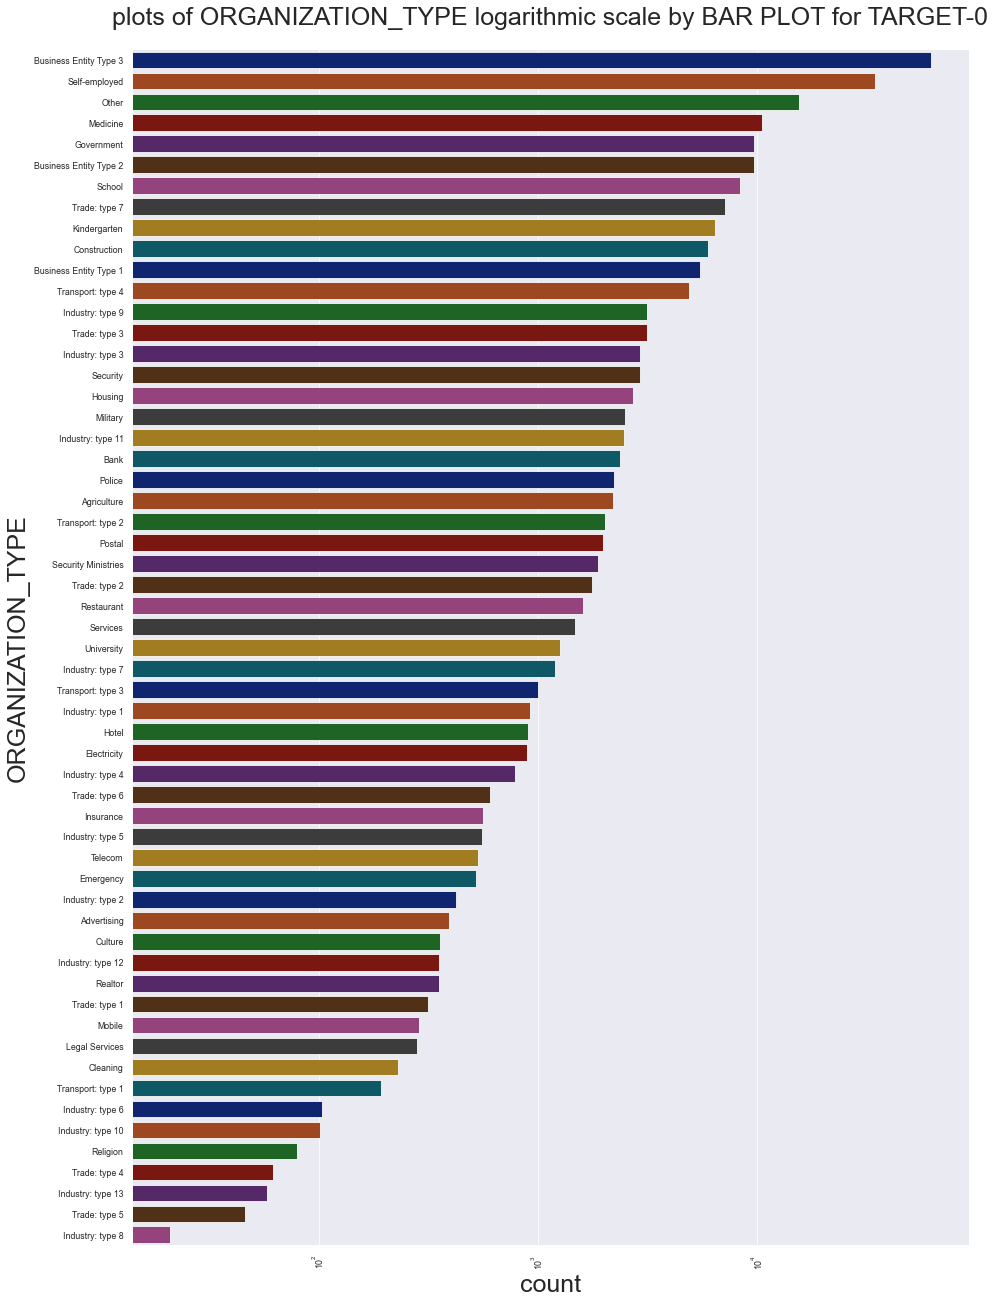

In [33]:

# plots of ORGANIZATION_TYPE logarithmic scale by BAR PLOT for TARGET-0

sns.set_style('darkgrid')
sns.set_context('paper')
sns.despine(left=True, bottom=True)

plt.figure(figsize=(15,22))
plt.rcParams["axes.labelsize"] = 25
plt.rcParams['axes.titlesize'] = 25
plt.rcParams['axes.titlepad'] = 25
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('plots of ORGANIZATION_TYPE logarithmic scale by BAR PLOT for TARGET-0')
ax = sns.countplot(data=target0_df,y='ORGANIZATION_TYPE',order=df1['ORGANIZATION_TYPE'].value_counts().index,palette='dark')
plt.show()

Points to be concluded from the above graph.
    1. Clients which have applied for credits are from most of the organization type ‘Business entity Type 3’ , ‘Self     employed’,‘Other’, ‘Medicine’ and ‘Government’.
    2.Less clients are from Industry type 8,type 6, type 10, religion and trade type 5, type 4.


<Figure size 432x288 with 0 Axes>

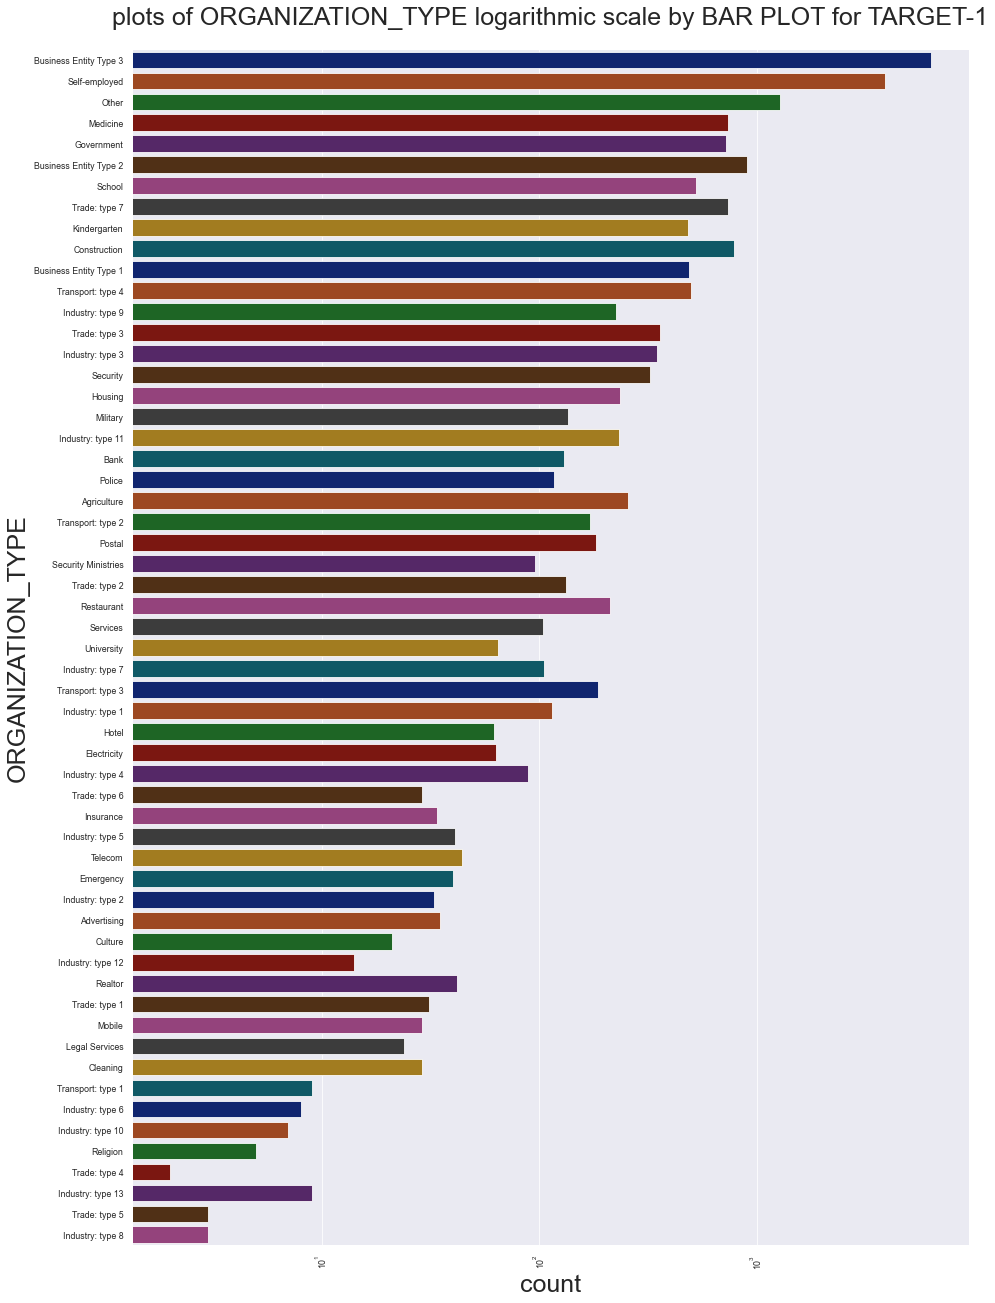

In [34]:

# plots of ORGANIZATION_TYPE logarithmic scale by BAR PLOT for TARGET-1

sns.set_style('darkgrid')
sns.set_context('paper')
sns.despine(left=True, bottom=True)

plt.figure(figsize=(15,22))
plt.rcParams["axes.labelsize"] = 25
plt.rcParams['axes.titlesize'] = 25
plt.rcParams['axes.titlepad'] = 25
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('plots of ORGANIZATION_TYPE logarithmic scale by BAR PLOT for TARGET-1')
ax = sns.countplot(data=target1_df,y='ORGANIZATION_TYPE',order=df1['ORGANIZATION_TYPE'].value_counts().index,palette='dark')
plt.show()

Points to be concluded from the above graph.

   1.Clients which have applied for credits are from most of the organization type ‘Business entity Type 3’ , ‘Self employed’ ,       ‘Other’,‘Medicine’ and ‘Government’.
   2.Less clients are from Industry type 8,type 6, type 10, religion and trade type 5, type 4.
   
   3.Same as type 0 in distribution of organization type.

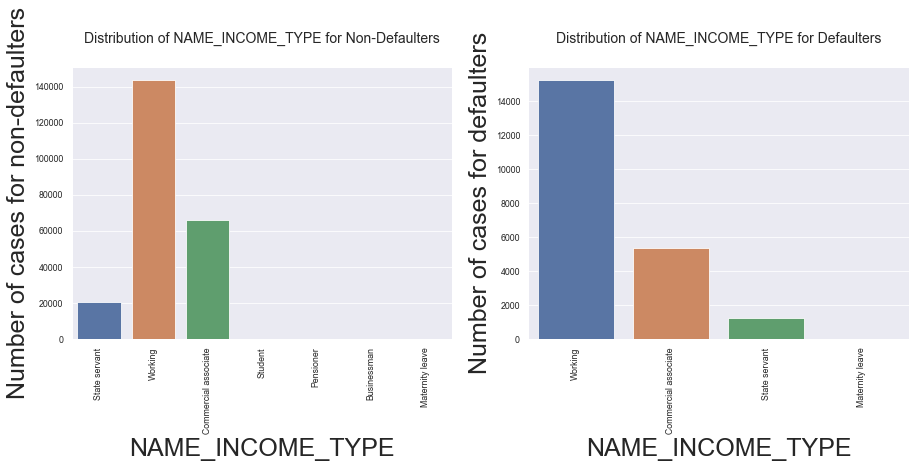

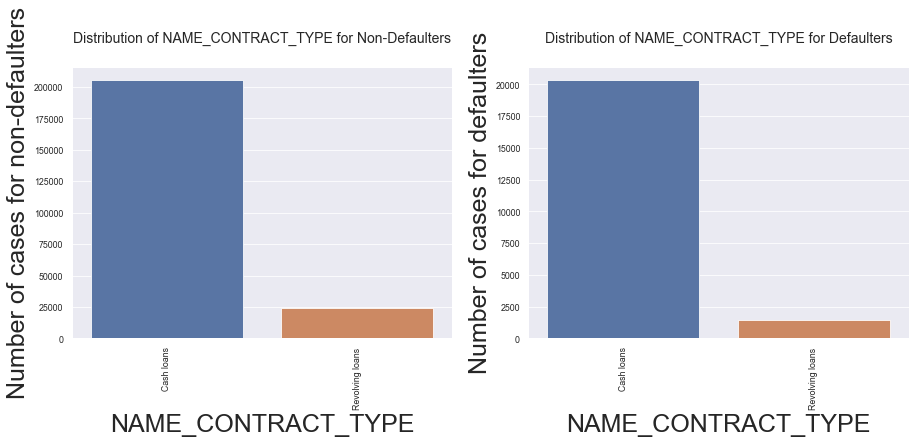

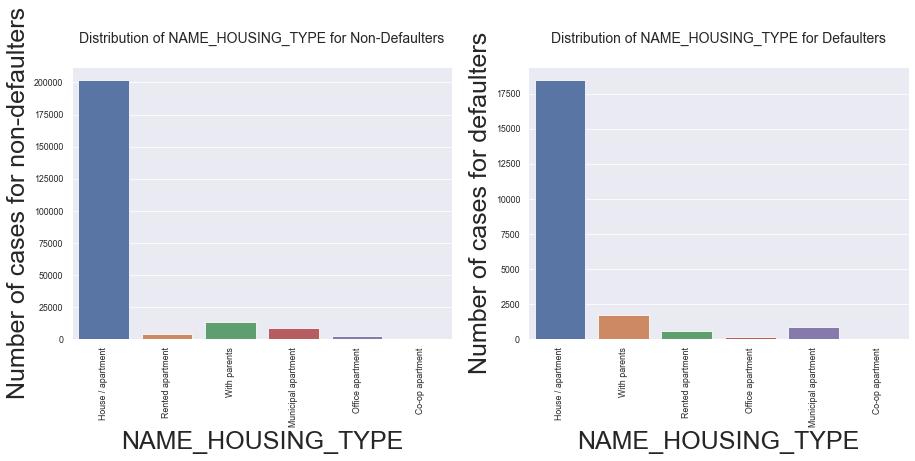

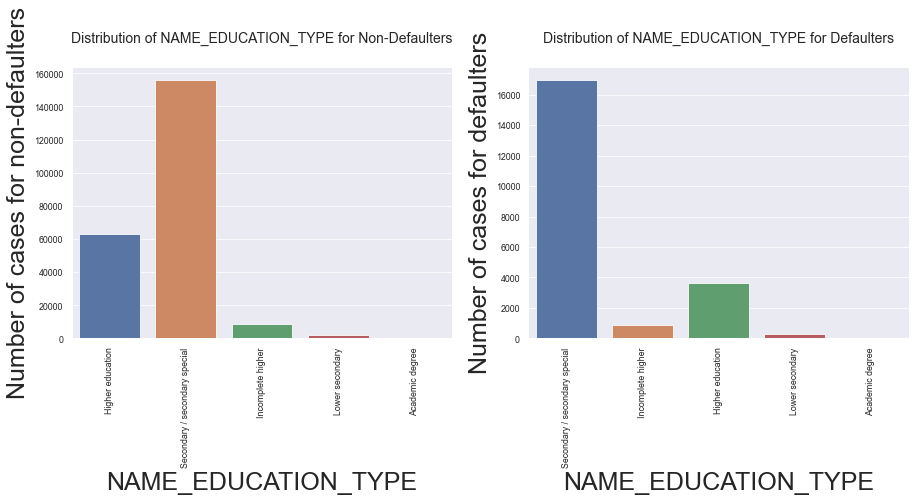

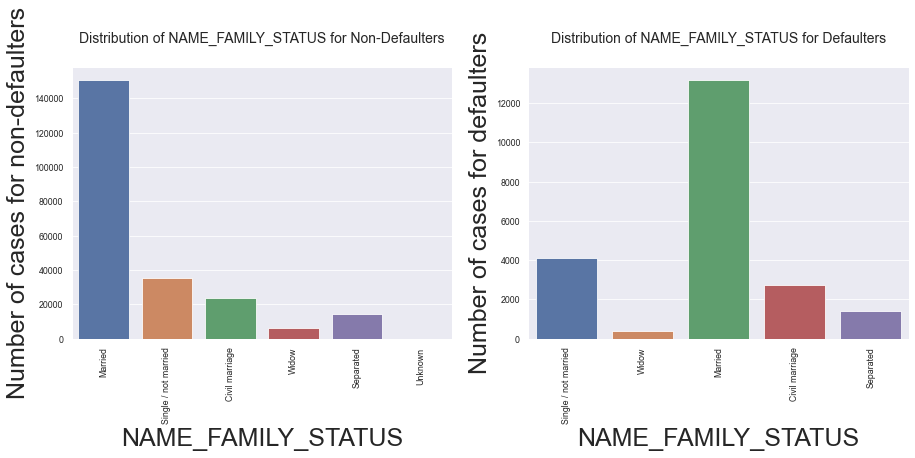

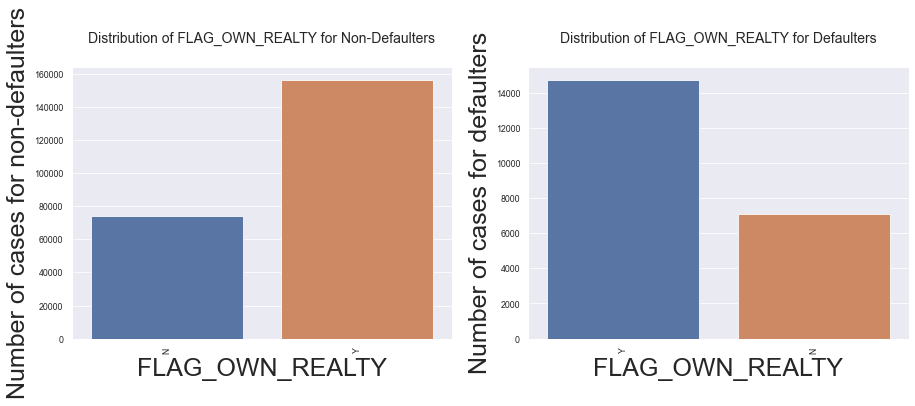

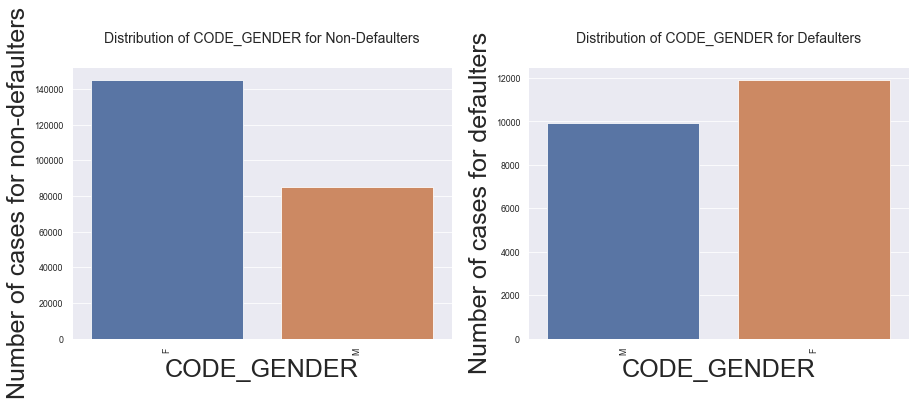

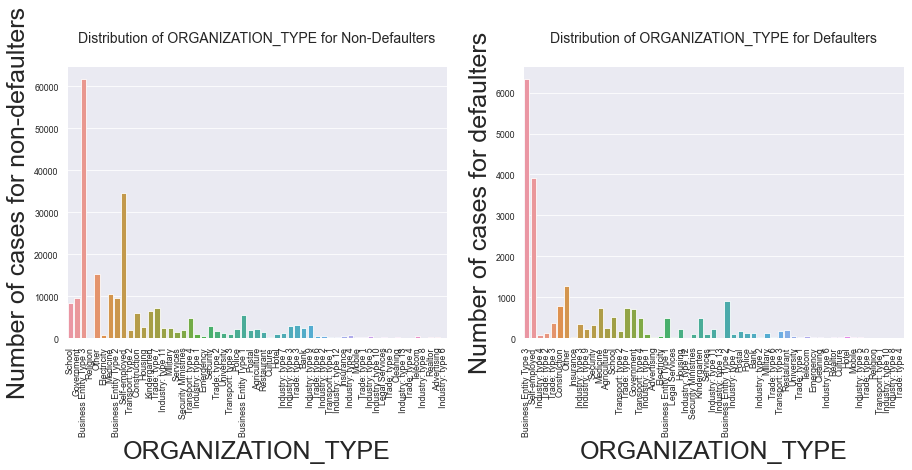

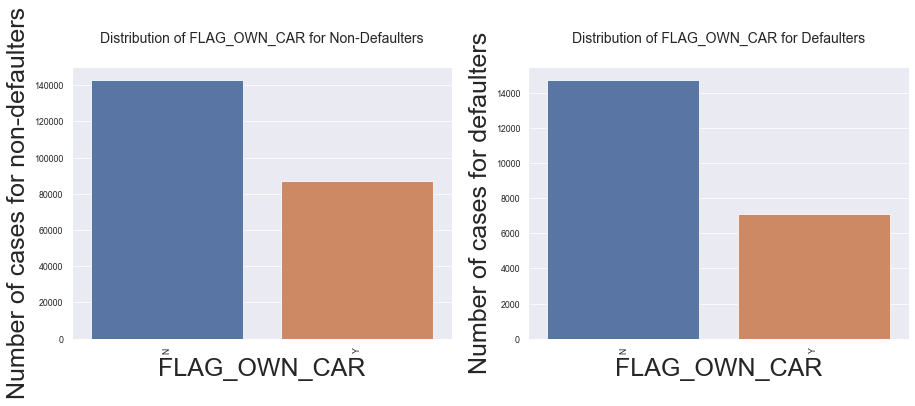

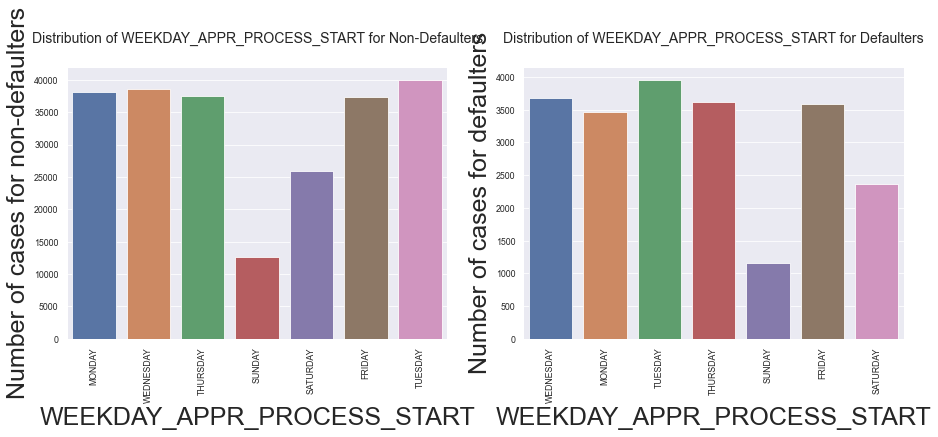

In [35]:
# Unordered Categorical Variables by barplot

for cat in categorical_columns:
    cat_plot_func(cat)

1.In this plot, NAME_INCOME_TYPE,Most of the defaults are from Working population.

2.For NAME_HOUSING_PLOT,Population living in Rented apartments and those living with parents have higher default rate as they have higher proportion in the Defaulted population as compared to non defaulted population. Living in rental apartment means a cash outflow towards rent and thus less cash left for repayment of loan. Living with parents may suggest that the income is not too high and thus difficulty in repayment of loan.


# 8. Bivariate analysis for numerical variables

In [36]:
#checking numerical_columns for Bivariate Analysis
df[numerical_columns]

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,1,0,202500.0,406597.5,0.018801,-9461,-637,-3648.0,-2120,...,0,0,0,0,0,0,0,0,0,0
1,100003,0,0,270000.0,1293502.5,0.003541,-16765,-1188,-1186.0,-291,...,0,0,0,0,0,0,0,0,0,0
2,100004,0,0,67500.0,135000.0,0.010032,-19046,-225,-4260.0,-2531,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,0,135000.0,312682.5,0.008019,-19005,-3039,-9833.0,-2437,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,0,121500.0,513000.0,0.028663,-19932,-3038,-4311.0,-3458,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307504,456248,0,0,153000.0,331920.0,0.022625,-16705,-7258,-9798.0,-259,...,0,0,0,0,0,0,0,0,0,0
307506,456251,0,0,157500.0,254700.0,0.032561,-9327,-236,-8456.0,-1982,...,0,0,0,0,0,0,0,0,0,0
307508,456253,0,0,153000.0,677664.0,0.005002,-14966,-7921,-6737.0,-5150,...,0,0,0,0,0,0,0,0,0,0
307509,456254,1,0,171000.0,370107.0,0.005313,-11961,-4786,-2562.0,-931,...,0,0,0,0,0,0,0,0,0,0


### I) TARGET-0

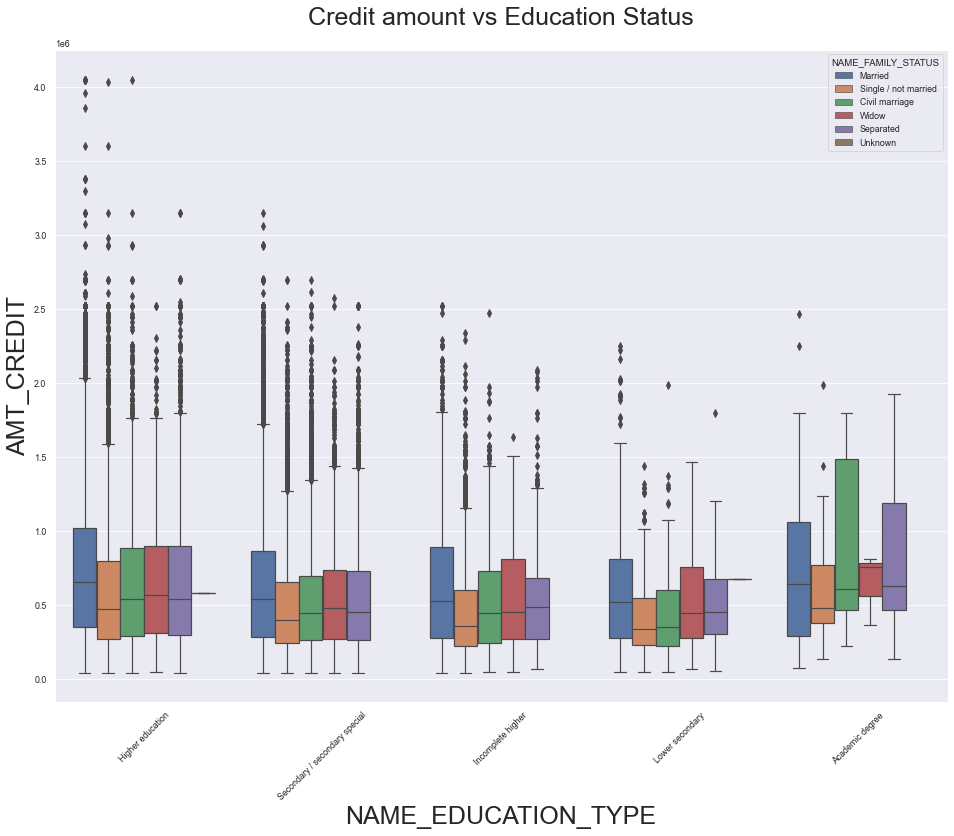

In [37]:
#bivariate analysis by boxplot between NAME_EDUCATION_TYPE and AMT_CREDIT

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data =target0_df, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit amount vs Education Status')
plt.show()

From the above box plot we can conclude that Family status of 'civil marriage', 'marriage' and 'separated' of Academic degree education are having higher number of credits than others. Also, higher education of family status of 'marriage', 'single' and 'civil marriage' are having more outliers. Civil marriage for Academic degree is having most of the credits in the third quartile.

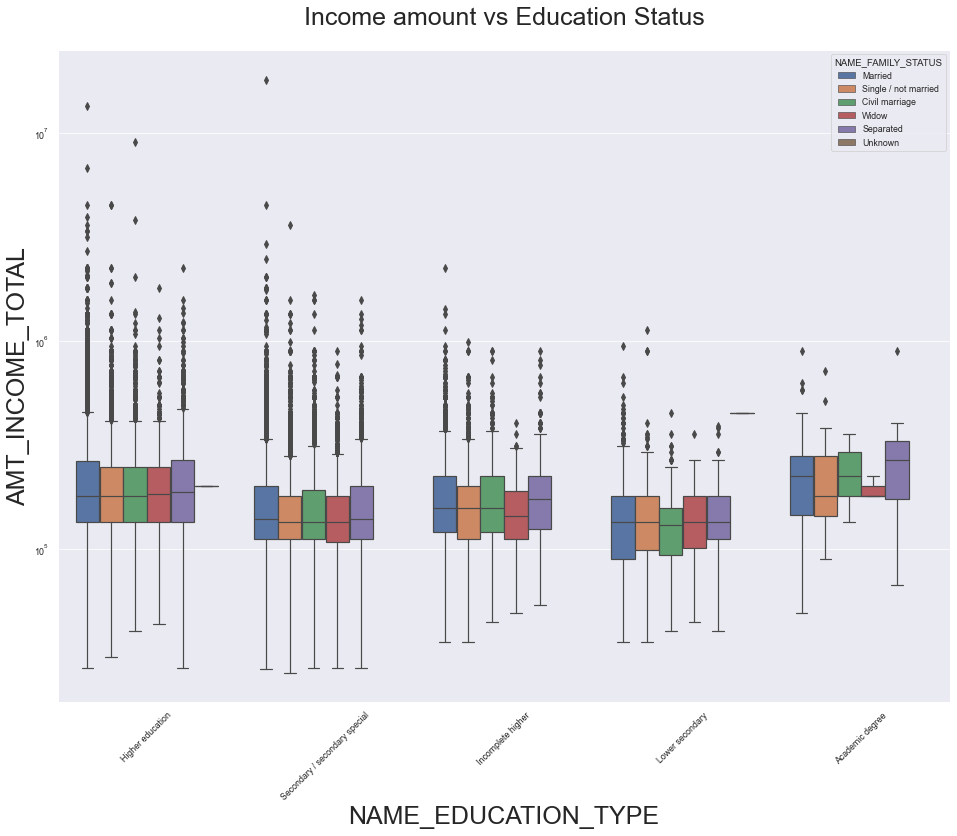

In [38]:
# Box plotting for Income amount in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =target0_df, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status')
plt.show()

From above boxplot for Education type 'Higher education' the income amount is mostly equal with family status. It does contain many outliers. Less outlier are having for Academic degree but there income amount is little higher that Higher education. Lower secondary of civil marriage family status are have less income amount than others.



### 2) TARGET-1

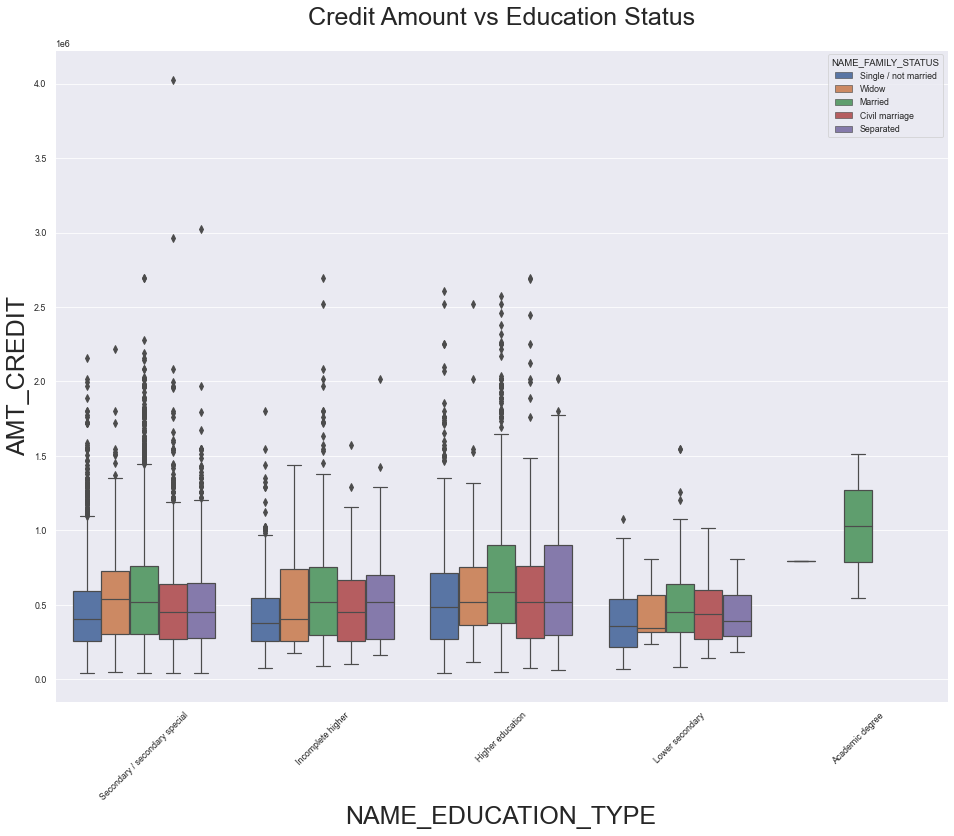

In [39]:
# Box plotting for credit amount

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
#c = "red"
sns.boxplot(data =target1_df, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
            

plt.title('Credit Amount vs Education Status')
plt.show()

From the above box plot we can say that Family status of 'civil marriage', 'marriage' and 'separated' of Academic degree education are having higher number of credits than others. Most of the outliers are from Education type 'Higher education' and 'Secondary'. Civil marriage for Academic degree is having most of the credits in the third quartile.

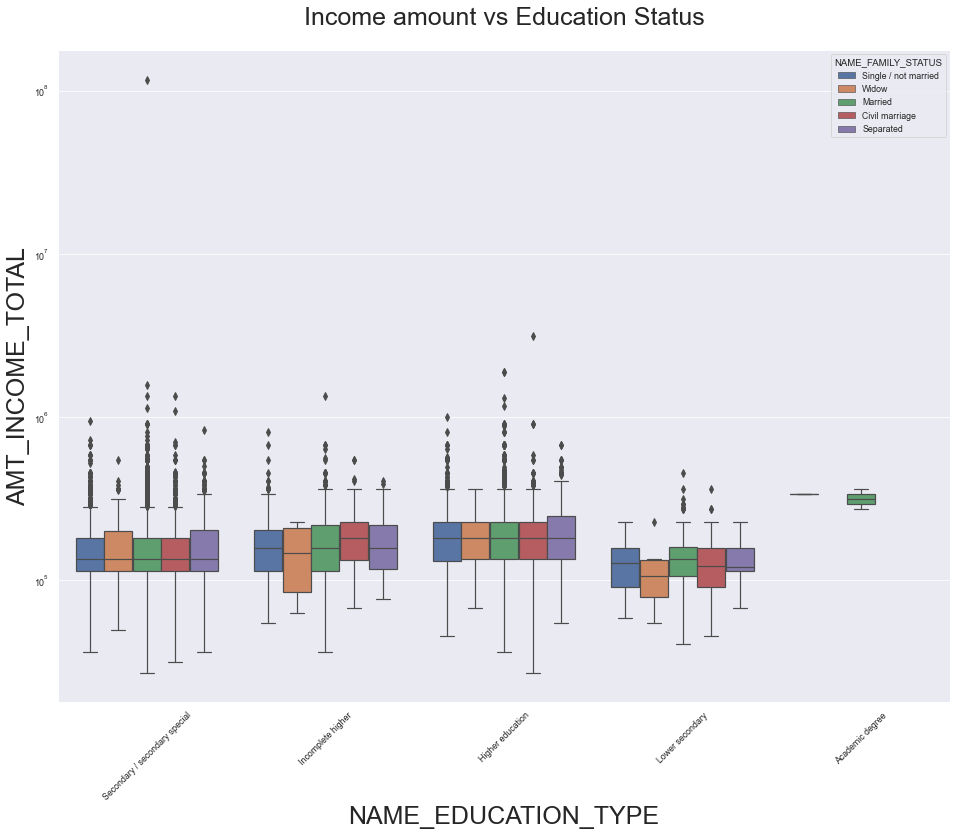

In [40]:
# Box plotting for Income amount in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =target1_df, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status')
plt.show()

From above boxplot for Education type 'Higher education' the income amount is mostly equal with family status. Less outlier are having for Academic degree but there income amount is little higher that Higher education. Lower secondary are have less income amount than others.

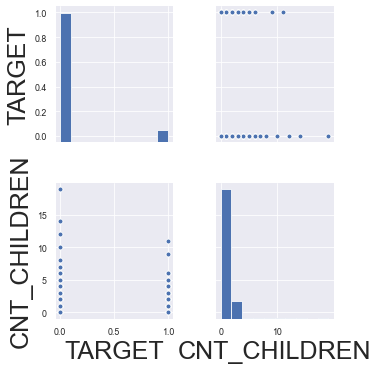

In [41]:
# pair plotting for TARGET and CNT_CHILDREN

sns.pairplot(data=df,vars=['TARGET','CNT_CHILDREN'])
plt.show()

# 9. Corelations

In [42]:
df[['TARGET','CNT_CHILDREN']].corr()

,TARGET,CNT_CHILDREN
TARGET,1.000000,0.007741
CNT_CHILDREN,0.007741,1.000000


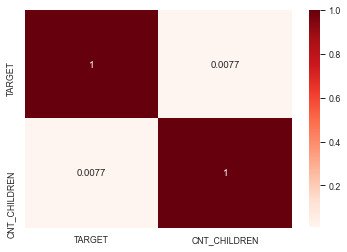

In [43]:
sns.heatmap(df[['TARGET','CNT_CHILDREN']].corr(),annot=True,cmap="Reds")
plt.show()

In [44]:
unwanted=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

df.drop(labels=unwanted,axis=1,inplace=True)

In [45]:
# Numerical columns
numerical_columns=df.describe().columns

In [46]:
df[numerical_columns].corr()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
SK_ID_CURR,1.000000,-0.001408,-0.001036,-0.002353,-0.000601,0.000536,-0.001449,-0.000084,0.000507,-0.000111,0.000168,-0.001036,0.001384,0.003367,-0.002604,-0.001407,0.000415
TARGET,-0.001408,1.000000,0.007741,-0.007332,-0.040659,-0.040640,0.065756,0.074958,0.036087,0.039910,-0.031099,0.004393,0.002107,-0.001738,0.041977,0.043384,0.024599
CNT_CHILDREN,-0.001036,0.007741,1.000000,-0.003541,-0.017720,-0.030726,0.236754,0.061145,0.159947,-0.114878,-0.033777,-0.023877,-0.018821,-0.008808,-0.003079,0.009639,0.018404
AMT_INCOME_TOTAL,-0.002353,-0.007332,-0.003541,1.000000,0.143098,0.072045,-0.021069,-0.013005,0.012851,-0.013416,0.026346,0.028218,0.056378,0.052731,-0.003156,-0.010458,-0.005966
AMT_CREDIT,-0.000601,-0.040659,-0.017720,0.143098,1.000000,0.103175,-0.157405,-0.091295,-0.017885,-0.038459,0.040722,0.020674,0.049296,0.050840,-0.038797,-0.040360,-0.016025
REGION_POPULATION_RELATIVE,0.000536,-0.040640,-0.030726,0.072045,0.103175,1.000000,-0.044293,0.004155,-0.060771,-0.006210,0.173339,-0.004885,0.062580,0.089183,-0.055625,-0.051363,-0.018137
DAYS_BIRTH,-0.001449,0.065756,0.236754,-0.021069,-0.157405,-0.044293,1.000000,0.352321,0.295930,0.112632,0.045302,0.057270,0.037895,0.012898,0.165163,0.113558,0.030977
DAYS_EMPLOYED,-0.000084,0.074958,0.061145,-0.013005,-0.091295,0.004155,0.352321,1.000000,0.171754,0.089869,0.018235,0.056887,0.081689,0.062197,0.114101,0.128797,0.075785
DAYS_REGISTRATION,0.000507,0.036087,0.159947,0.012851,-0.017885,-0.060771,0.295930,0.171754,1.000000,0.032924,-0.033961,0.019846,0.016565,0.008494,0.046784,0.056189,0.031988
DAYS_ID_PUBLISH,-0.000111,0.039910,-0.114878,-0.013416,-0.038459,-0.006210,0.112632,0.089869,0.032924,1.000000,0.004475,0.026765,0.020377,0.008331,0.054359,0.033210,0.001245


In [47]:
# Finding some correlation for numerical columns for both target 0 and 1 

target0_corr=df.iloc[0:,2:]
target1_corr=df.iloc[0:,2:]

target0=target0_corr.corr(method='spearman')
target1=target1_corr.corr(method='spearman')

In [48]:
# Now, plotting the above correlation with heat map as it is the best choice to visulaize

# figure size

def targets_corr(data,title):
    plt.figure(figsize=(15, 10))
    plt.rcParams['axes.titlesize'] = 25
    plt.rcParams['axes.titlepad'] = 70
    

# heatmap with a color map of choice


    sns.heatmap(data, cmap="Greens",annot=False)

    plt.title(title)
    plt.yticks(rotation=0)
    plt.show()

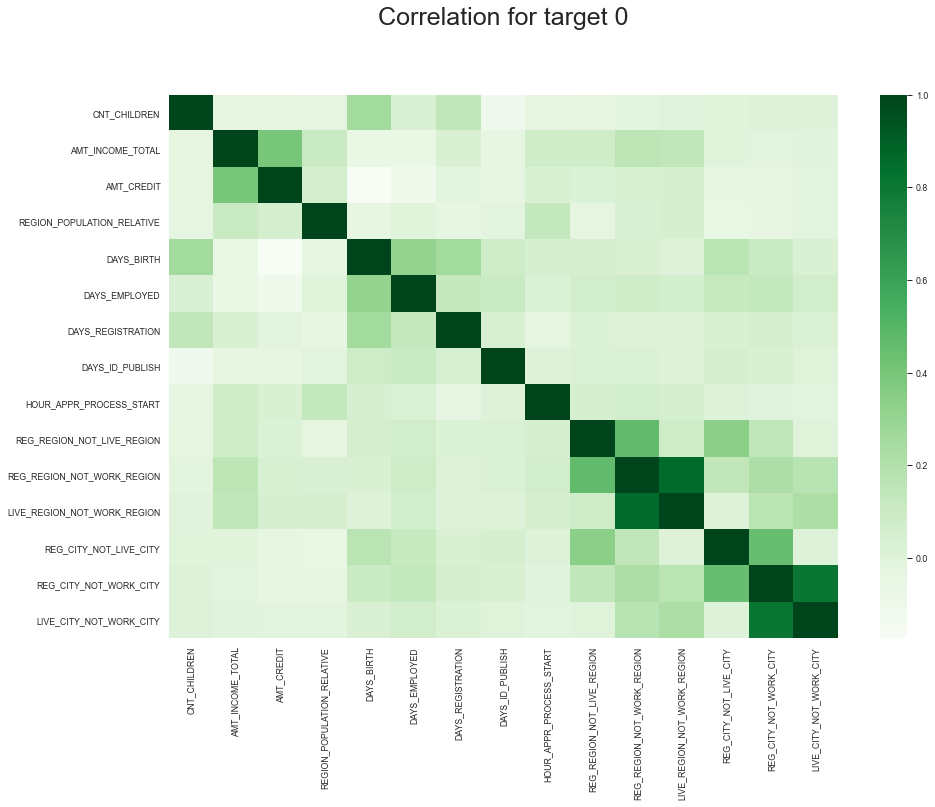

In [49]:
# For Target 0

targets_corr(data=target0,title='Correlation for target 0')

As we can see from above correlation heatmap for TARGET-0, There are number of observation we can point out

1.Credit amount is inversely proportional to the date of birth, which means Credit amount is higher for low age and vice-versa.

2.Credit amount is inversely proportional to the number of children client have, means Credit amount is higher for less 

3.children count client have and vice-versa.

4.Income amount is inversely proportional to the number of children client have, means more income for less children client have and vice-versa.

5.less children client have in densely populated area.

6.Credit amount is higher to densely populated area.

7.The income is also higher in densely populated area.

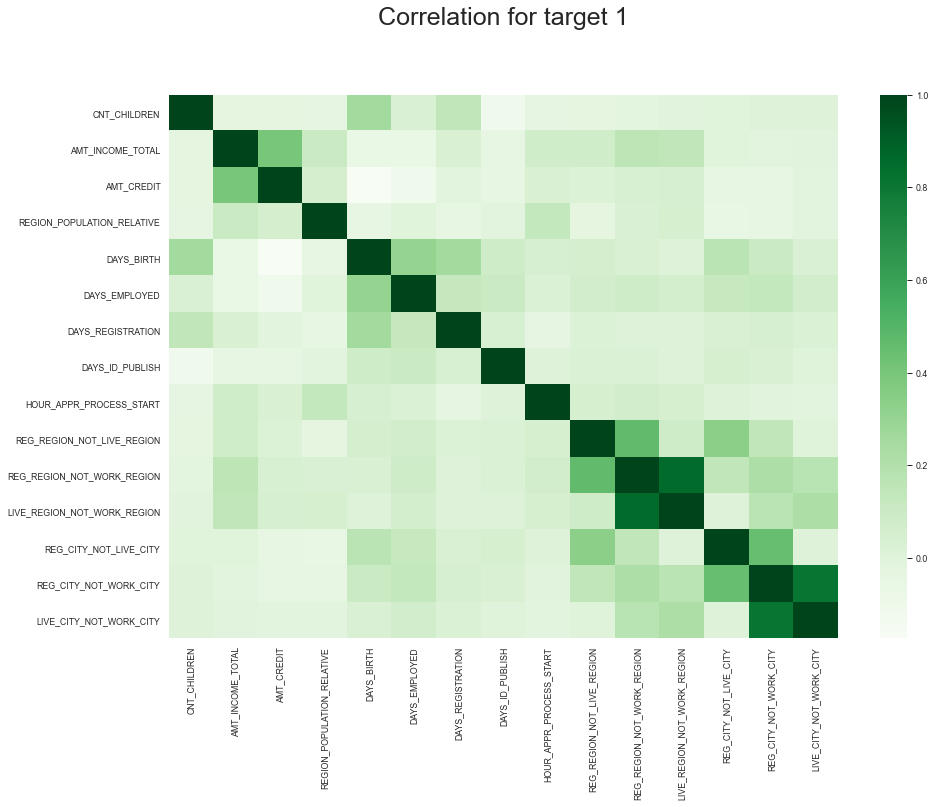

In [50]:
# For Target 1

targets_corr(data=target1,title='Correlation for target 1')


This heat map for Target 1 is also having quite a same observation just like Target 0. But for few points are different. They are listed below.

1.The client's permanent address does not match contact address are having less children.

2.The client's permanent address does not match work address are having less children.

Top 10 correlations in both the Default and non default population are same:

OBS_30_CNT_SOCIAL_CIRCLE- OBS_60_CNT_SOCIAL_CIRCLE

AMT_GOODS_PRICE- AMT_CREDIT

REGION_RATING_CLIENT_W_CITY- REGION_RATING_CLIENT

CNT_FAM_MEMBERS- CNT_CHILDREN

DEF_60_CNT_SOCIAL_CIRCLE- DEF_30_CNT_SOCIAL_CIRCLE

AMT_CREDIT- AMT_ANNUITY

AMT_ANNUITY- AMT_GOODS_PRICE

EXT_SOURCE_1- AGE

REGION_POPULATION_RELATIVE- REGION_RATING_CLIENT_W_CITY

REGION_RATING_CLIENT- REGION_POPULATION_RELATIVE

# 10. Importing Previous Application

In [51]:
#import previous application data
df_2=pd.read_csv("previous_application.csv")
df_2

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,...,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,...,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,...,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0


In [52]:
#checking null values
null_Values=df_2.isnull().sum()
null_Values

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [53]:
#removing columns which have more than 30 percent null values

null_Values_1=list(null_Values[null_Values.values>=0.30].index)
df_2.drop(labels=null_Values_1,axis=1,inplace=True)
df_2.shape

(1670214, 21)

In [54]:
# Removing the column values of 'XNA' and 'XAP'

df_2=df_2.drop(df_2[df_2['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
df_2=df_2.drop(df_2[df_2['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
df_2=df_2.drop(df_2[df_2['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)

df_2.shape

(69635, 21)

In [55]:
# Now merging the Application dataset with previous appliaction dataset

new_df=pd.merge(left=df,right=df_2,how='inner',on='SK_ID_CURR',suffixes='_x')

In [56]:

# Renaming the column names after merging

new_df1 = new_df.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV',
                         'WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)


In [57]:
# Removing unwanted columns for analysis

new_df1.drop(['SK_ID_CURR','WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION', 
              'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
              'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','WEEKDAY_APPR_PROCESS_START_PREV',
              'HOUR_APPR_PROCESS_START_PREV', 'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY'],axis=1,inplace=True)

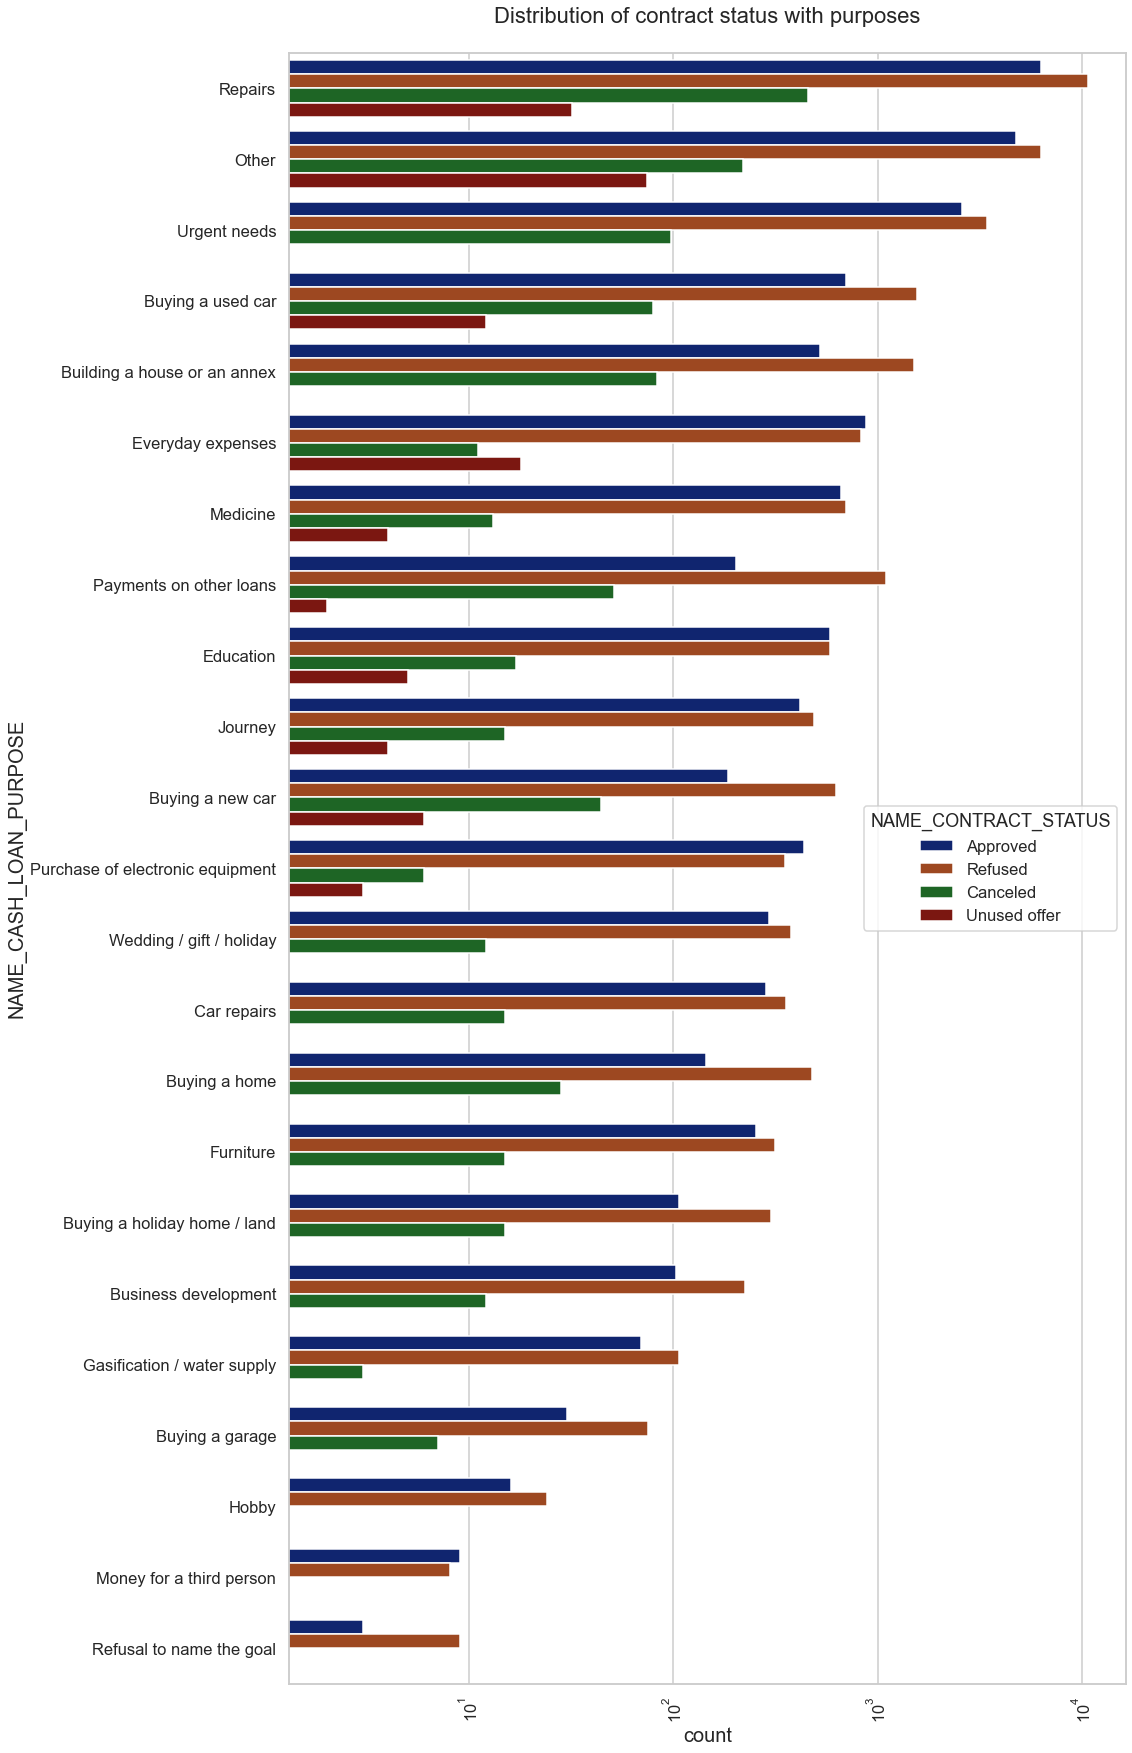

In [58]:

# Distribution of contract status in logarithmic scale

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of contract status with purposes')
ax = sns.countplot(data = new_df1, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=new_df1['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='dark')

Points to be concluded from above plot:

1.Most rejection of loans came from purpose 'repairs'.

2.For education purposes we have equal number of approves and rejection

3.Payign other loans and buying a new car is having significant higher rejection than approves.

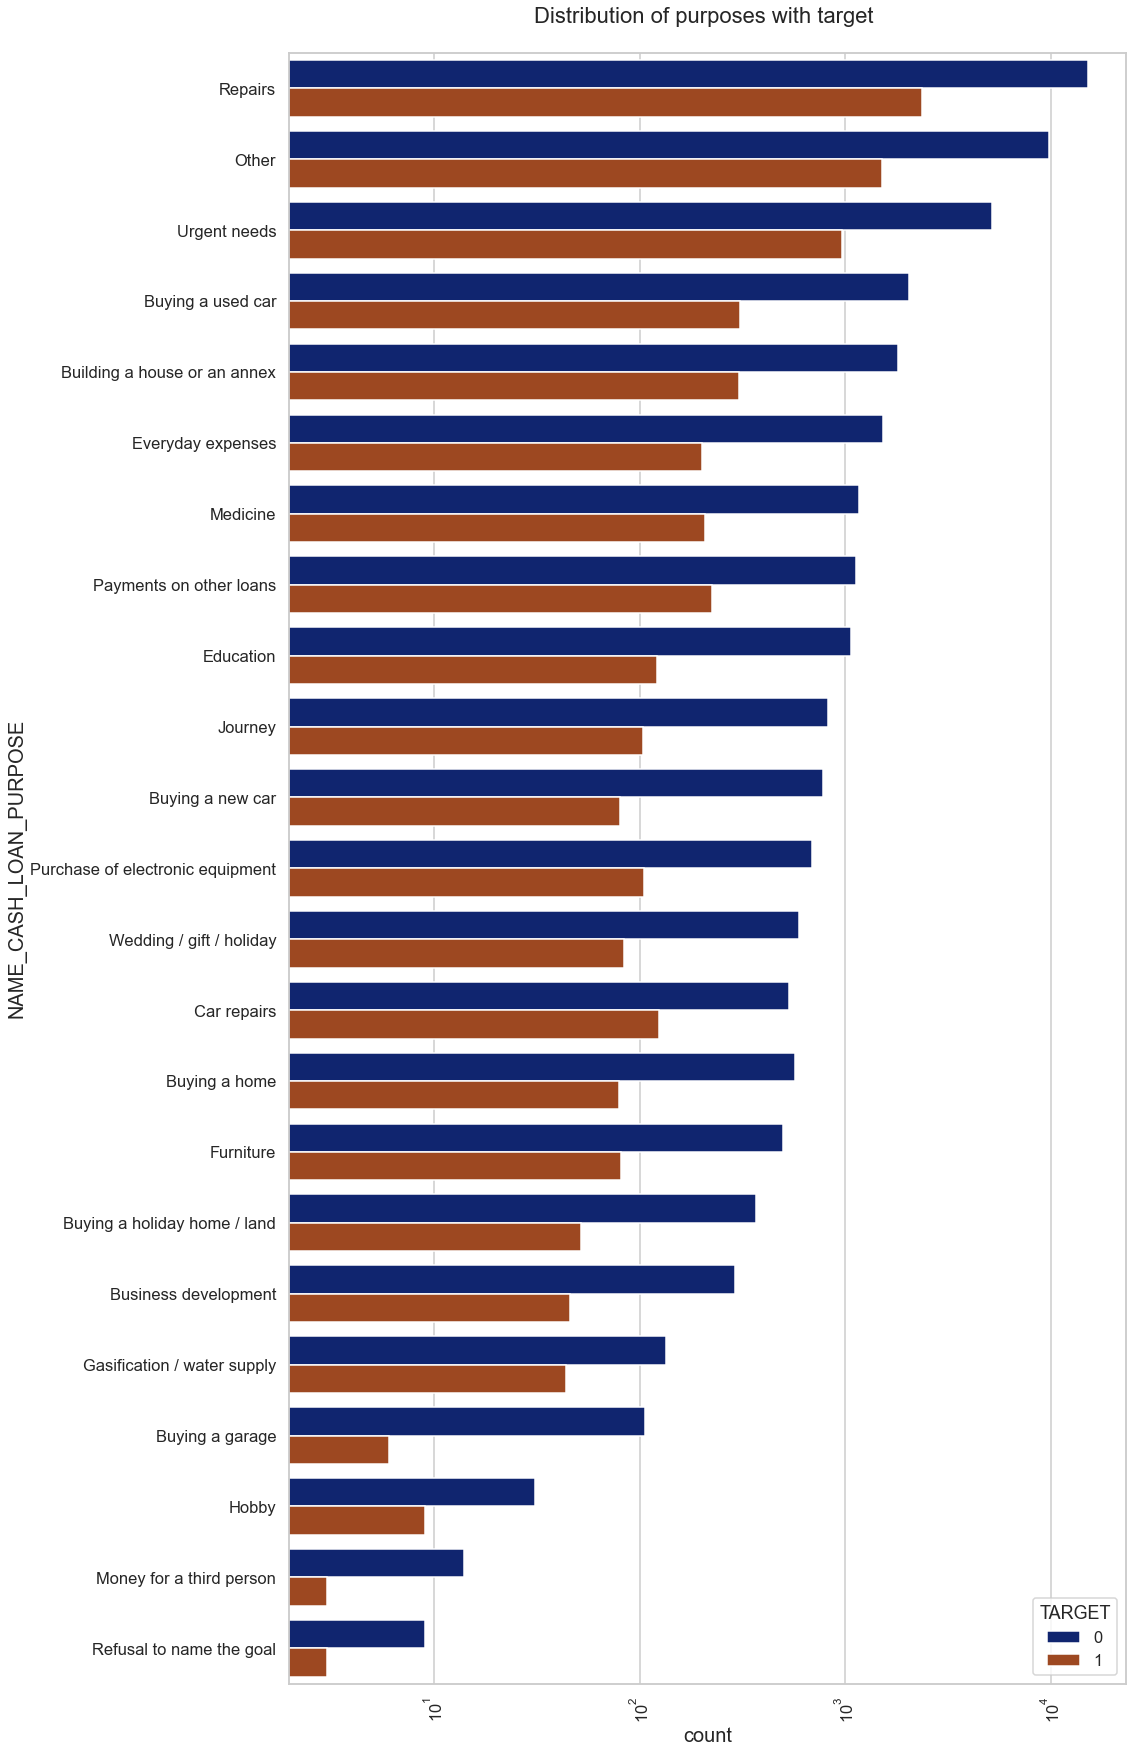

In [59]:
# Distribution of contract status

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of purposes with target ')
ax = sns.countplot(data = new_df1, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=new_df1['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET',palette='dark')

In [60]:
#checking the columns in the new dataframe
new_df1.columns

Index(['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'ORGANIZATION_TYPE', 'SK_ID_PREV', 'NAME_CONTRACT_TYPE_PREV',
       'AMT_APPLICATION', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS',
       'DAYS_DECISION', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA',
       'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP'],
      dtype='object')

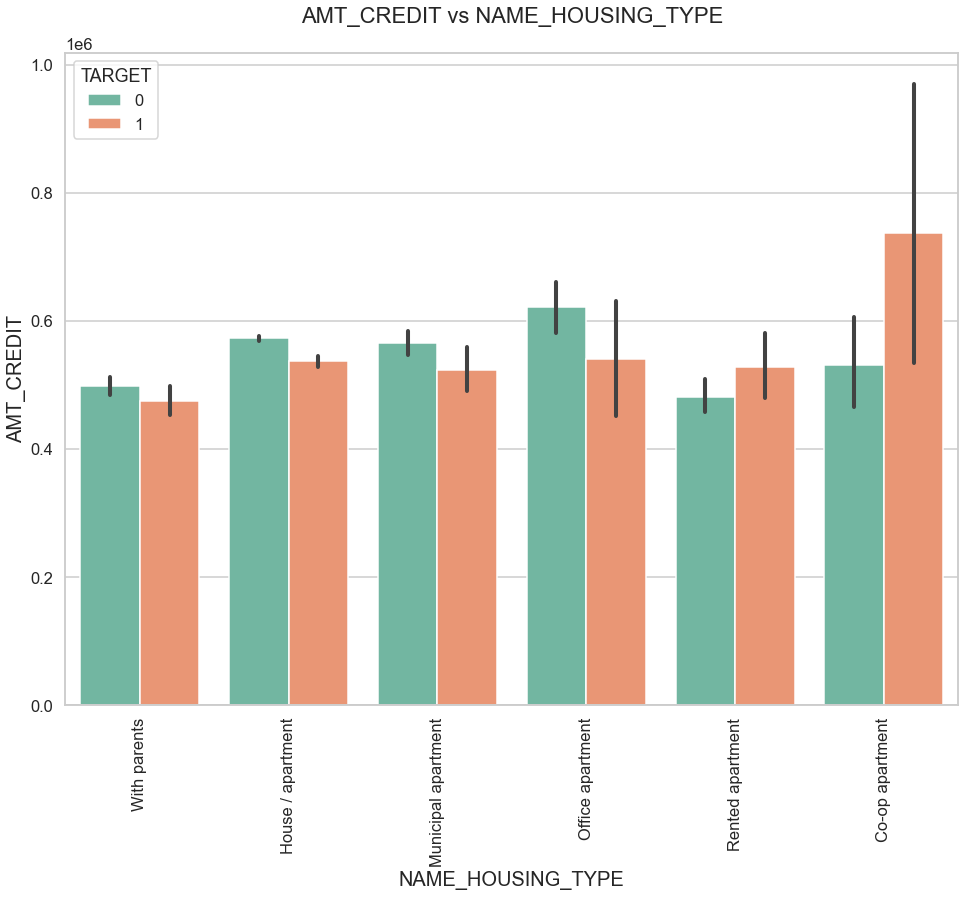

In [61]:
# Bar plotting for AMT_CREDIT vs NAME_HOUSING_TYPE in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
sns.barplot(data =new_df1, y='AMT_CREDIT',hue='TARGET',x='NAME_HOUSING_TYPE',palette='Set2')
plt.title('AMT_CREDIT vs NAME_HOUSING_TYPE')
plt.show()

Here for Housing type, office appartment is having higher credit of target 0 and co-op apartment is having higher credit of target 1. So, we can conclude that bank should avoid giving loans to the housing type of co-op apartment as they are having difficulties in payment. Bank can focus mostly on housing type with parents or House\appartment or miuncipal appartment for successful payments.

# CONCLUSION
After all these analysis we conculded that 
1. Banks should focus more on contract type Student ,pensioner and Businessman with housing type other than Co-op apartment,Office apartment for successful payments.

2. Banks should focus less on income type Working as they are having most number of unsuccessful payments.

3. Also with loan purpose Repair is having higher number of unsuccessful payments on time.

4. Get as much as clients from housing type With parents as they are having least number of unsuccessful payments.